## Imports

In [330]:
# General Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pickle
import os

#from eda import * # A MODIFIER CAR PAS PEP8 ET YA DES TRUCS QUI MARCHENT PAS

from numpy import radians, cos, sin, sqrt
from numpy import arcsin as asin

# Folium
#!pip install folium
import folium
from folium.plugins import HeatMap

# Dates
import datetime as dt
from datetime import timedelta

# KNN imputer
from sklearn.impute import KNNImputer

# Outliers
from sklearn.ensemble import IsolationForest

# Warnings
import warnings
warnings.simplefilter(action = 'ignore')

# Sommaire
#!pip install jyquickhelper
from jyquickhelper import add_notebook_menu # attention, ne prend que les titres de niveau 2
add_notebook_menu()

In [331]:
# Set display preferences
pd.set_option('display.max_row', 250)
pd.set_option('display.max_column', 100)
pd.set_option('display.precision', 5)

In [332]:
# si google colab :
#from google.colab import drive
#drive.mount('/content/drive')

In [333]:
# Chemin d'accès aux données (à modifier si code en local)
#path = '/content/drive/MyDrive/OpenClassrooms/Projet5/' #-> pour colab
path = '' #-> en local

# Load datasets
df_customers = pd.read_csv(os.path.join(path, 'data/olist_customers_dataset.csv'))
df_geolocation = pd.read_csv(os.path.join(path, 'data/olist_geolocation_dataset.csv'))
df_order_items = pd.read_csv(os.path.join(path, 'data/olist_order_items_dataset.csv'))
df_order_payments = pd.read_csv(os.path.join(path, 'data/olist_order_payments_dataset.csv'))
df_order_reviews = pd.read_csv(os.path.join(path, 'data/olist_order_reviews_dataset.csv'))
df_orders = pd.read_csv(os.path.join(path, 'data/olist_orders_dataset.csv'))
df_products = pd.read_csv(os.path.join(path, 'data/olist_products_dataset.csv'))
df_sellers = pd.read_csv(os.path.join(path, 'data/olist_sellers_dataset.csv'))
df_product_category = pd.read_csv(os.path.join(path, 'data/product_category_name_translation.csv'))

## Exploration de chaque dataset

### 1 - Customers dataset

In [334]:
# This dataset has information about the customer and its location. Use it to identify unique customers in the
# orders dataset and to find the orders delivery location.

# same customer will get different ids for different orders

In [335]:
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [336]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [337]:
# customer_id -> key to the orders dataset
# customer_unique_id -> unique identifier of a customer
# customer_zip_code_prefix -> 5 digits customer zop code
# customer_city -> customer city name
# customer_state -> customer state

In [338]:
df_customers['customer_zip_code_prefix'].nunique()

14994

Text(0, 0.5, 'Nombre de clients')

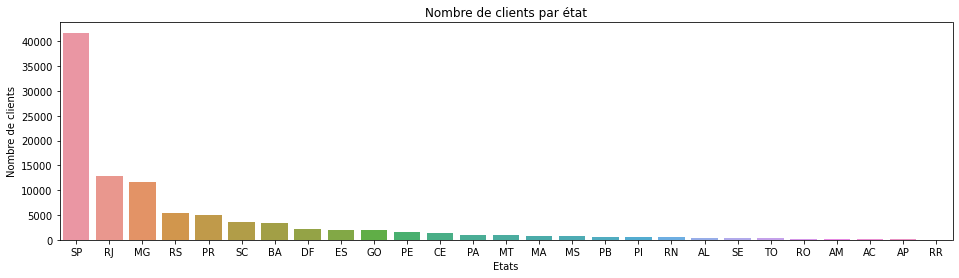

In [339]:
# Visualisation du nombre de clients par état

plt.figure(figsize = (16, 4))
plt.title('Nombre de clients par état')
sns.barplot(y = df_customers["customer_state"].value_counts(),
            x = df_customers["customer_state"].value_counts().index)
plt.xlabel('Etats')
plt.ylabel('Nombre de clients')

Text(0, 0.5, 'Nombre de clients')

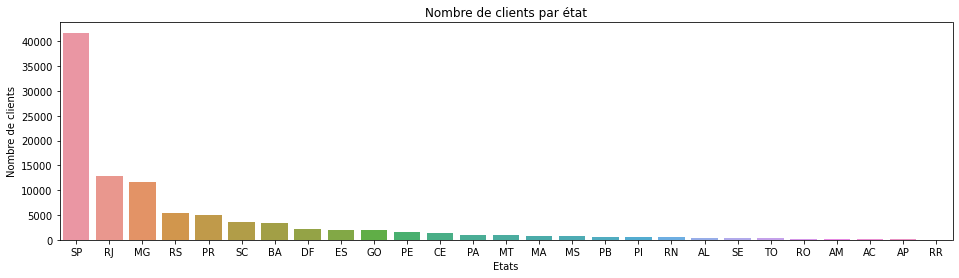

In [340]:
plt.figure(figsize = (16, 4))
plt.title('Nombre de clients par état')
sns.barplot(x = df_customers["customer_state"].value_counts().index,
            y = df_customers["customer_state"].value_counts()
            )
plt.xlabel('Etats')
plt.ylabel('Nombre de clients')

In [341]:
# majorité des clients à SP (São Paulo)

# faire un encodage du type : SP -> 0, les autres villes -> 1 ?

### 2 - Geolocation dataset

In [342]:
# This dataset has information Brazilian zip codes and its lat/lng coordinates. Use it to plot maps and find
# distances between sellers and customers

# -> Données géographiques

In [343]:
# Aperçu des données
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.54562,-46.63929,sao paulo,SP
1,1046,-23.54608,-46.64482,sao paulo,SP
2,1046,-23.54613,-46.64295,sao paulo,SP
3,1041,-23.54439,-46.63950,sao paulo,SP
4,1035,-23.54158,-46.64161,sao paulo,SP


In [344]:
# -> faire moyenne ou barycentre pour avoir un ensemble de coordonnées par ville/code/etat

In [345]:
# Structure des données
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [346]:
########## Visualisation des données - Carte Folium ##########

# Map folium
brazil_coordinates = (-14.2400732, -53.1805017) # coordonnées prises sur wikipedia

# Generating the data that will be given to the heatmap
heat_data = [[row["geolocation_lat"], row["geolocation_lng"]] for index, row in df_geolocation.iterrows()]

# Creating the base map
base_map = folium.Map(location = brazil_coordinates, zoom_start = 2)

# Adding the heatmap layer
HeatMap(data = heat_data, radius = 8, max_zoom = 13).add_to(base_map)

# Displaying the map
# base_map

In [347]:
# -> attention, quelques outliers - la plupart des points sont au Brésil mais certains sont dans d'autres pays.

In [348]:
########## OUTLIERS ##########

# -> supprimer outliers pour ne garder que les points situés au Brésil

# Nord (lat)
df_geolocation = df_geolocation[df_geolocation.geolocation_lat <= 5.27438888] # lat max du Brésil au Nord
# Sud (lat)
df_geolocation = df_geolocation[df_geolocation.geolocation_lat >= -33.75116944] # lat min du Brésil au Sud

# Ouest (long)
df_geolocation = df_geolocation[df_geolocation.geolocation_lng >= -73.98283055] # long max du Brésil à l'Ouest
# Est (long)
df_geolocation = df_geolocation[df_geolocation.geolocation_lng <= -34.79314722] # long max du Brésil à l'Est

In [349]:
# (WIP) test avec bokeh

"""

# plot wtih holoviews + datashader - bokeh with map background
import holoviews as hv
!pip install geoviews
!pip install datashader
import geoviews as gv
import datashader as ds
from colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr
from datashader.colors import colormap_select, Greys9
from holoviews.streams import RangeXY
from holoviews.operation.datashader import datashade, dynspread, rasterize
from bokeh.io import push_notebook, show, output_notebook
output_notebook()
hv.extension('bokeh')

%opts Overlay [width=800 height=600 toolbar='above' xaxis=None yaxis=None]
%opts QuadMesh [tools=['hover'] colorbar=True] (alpha=0 hover_alpha=0.2)

T = 0.05
PX = 1

def plot_map(data, label, agg_data, agg_name, cmap):
    url="http://server.arcgisonline.com/ArcGIS/rest/services/Canvas/World_Dark_Gray_Base/MapServer/tile/{Z}/{Y}/{X}.png"
    geomap = gv.WMTS(url)
    points = hv.Points(gv.Dataset(data, kdims = ['x', 'y'], vdims = [agg_name]))
    agg = datashade(points, element_type = gv.Image, aggregator = agg_data, cmap = cmap)
    zip_codes = dynspread(agg, threshold = T, max_px = PX)
    hover = hv.util.Dynamic(rasterize(points, aggregator = agg_data, width = 50, height = 25, streams = [RangeXY]), operation = hv.QuadMesh)
    hover = hover.options(cmap = cmap)
    img = geomap * zip_codes * hover
    img = img.relabel(label)
    return img

"""

'\n\n# plot wtih holoviews + datashader - bokeh with map background\nimport holoviews as hv\n!pip install geoviews\n!pip install datashader\nimport geoviews as gv\nimport datashader as ds\nfrom colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr\nfrom datashader.colors import colormap_select, Greys9\nfrom holoviews.streams import RangeXY\nfrom holoviews.operation.datashader import datashade, dynspread, rasterize\nfrom bokeh.io import push_notebook, show, output_notebook\noutput_notebook()\nhv.extension(\'bokeh\')\n\n%opts Overlay [width=800 height=600 toolbar=\'above\' xaxis=None yaxis=None]\n%opts QuadMesh [tools=[\'hover\'] colorbar=True] (alpha=0 hover_alpha=0.2)\n\nT = 0.05\nPX = 1\n\ndef plot_map(data, label, agg_data, agg_name, cmap):\n    url="http://server.arcgisonline.com/ArcGIS/rest/services/Canvas/World_Dark_Gray_Base/MapServer/tile/{Z}/{Y}/{X}.png"\n    geomap = gv.WMTS(url)\n    points = hv.Points(gv.Dataset(data, kdims = [\'x\', \'y\'], vdims = [agg_name]))\n    agg = da

In [350]:
# (WIP)

"""

# copier df
brazil = pd.read_csv(os.path.join(path, 'data/olist_geolocation_dataset.csv'), dtype = {'geolocation_zip_code_prefix': str})

# Gets the first three and four first digits of zip codes, we will explore this further to understand how zip codes works
brazil['geolocation_zip_code_prefix_1_digits'] = brazil['geolocation_zip_code_prefix'].str[0:1]
brazil['geolocation_zip_code_prefix_2_digits'] = brazil['geolocation_zip_code_prefix'].str[0:2]
brazil['geolocation_zip_code_prefix_3_digits'] = brazil['geolocation_zip_code_prefix'].str[0:3]
brazil['geolocation_zip_code_prefix_4_digits'] = brazil['geolocation_zip_code_prefix'].str[0:4]

from datashader.utils import lnglat_to_meters as webm
x, y = webm(brazil.geolocation_lng, brazil.geolocation_lat)
brazil['x'] = pd.Series(x)
brazil['y'] = pd.Series(y)

# transforming the prefixes to int for plotting purposes
brazil['geolocation_zip_code_prefix'] = brazil['geolocation_zip_code_prefix'].astype(int)
brazil['geolocation_zip_code_prefix_1_digits'] = brazil['geolocation_zip_code_prefix_1_digits'].astype(int)
brazil['geolocation_zip_code_prefix_2_digits'] = brazil['geolocation_zip_code_prefix_2_digits'].astype(int)
brazil['geolocation_zip_code_prefix_3_digits'] = brazil['geolocation_zip_code_prefix_3_digits'].astype(int)
brazil['geolocation_zip_code_prefix_4_digits'] = brazil['geolocation_zip_code_prefix_4_digits'].astype(int)

agg_name = 'geolocation_zip_code_prefix'

#from google.colab import output
#output.enable_custom_widget_manager()

#!pip install jupyter_bokeh
plot_map(brazil, 'Zip Codes in Brazil', ds.min(agg_name), agg_name, cmap = rainbow)

# marche pas ??

"""

"\n\n# copier df\nbrazil = pd.read_csv(os.path.join(path, 'data/olist_geolocation_dataset.csv'), dtype = {'geolocation_zip_code_prefix': str})\n\n# Gets the first three and four first digits of zip codes, we will explore this further to understand how zip codes works\nbrazil['geolocation_zip_code_prefix_1_digits'] = brazil['geolocation_zip_code_prefix'].str[0:1]\nbrazil['geolocation_zip_code_prefix_2_digits'] = brazil['geolocation_zip_code_prefix'].str[0:2]\nbrazil['geolocation_zip_code_prefix_3_digits'] = brazil['geolocation_zip_code_prefix'].str[0:3]\nbrazil['geolocation_zip_code_prefix_4_digits'] = brazil['geolocation_zip_code_prefix'].str[0:4]\n\nfrom datashader.utils import lnglat_to_meters as webm\nx, y = webm(brazil.geolocation_lng, brazil.geolocation_lat)\nbrazil['x'] = pd.Series(x)\nbrazil['y'] = pd.Series(y)\n\n# transforming the prefixes to int for plotting purposes\nbrazil['geolocation_zip_code_prefix'] = brazil['geolocation_zip_code_prefix'].astype(int)\nbrazil['geolocatio

In [351]:
# (WIP) plot wtih datashader - image with black background

"""
import datashader as ds
from datashader import transfer_functions as tf
from functools import partial
from datashader.utils import export_image
from IPython.core.display import HTML, display
from colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr

background = "black"
cm = partial(colormap_select, reverse = (background! = "black"))
export = partial(export_image, background = background, export_path = "export")
display(HTML("<style>.container { width:100% !important; }</style>"))
W = 700

def create_map(data, cmap, data_agg, export_name = 'img'):
    pad = (data.x.max() - data.x.min())/50
    x_range, y_range = ((data.x.min() - pad, data.x.max() + pad),
                             (data.y.min() - pad, data.y.max() + pad))

    ratio = (y_range[1] - y_range[0]) / (x_range[1] - x_range[0])

    plot_width  = int(W)
    plot_height = int(plot_width * ratio)
    if ratio > 1.5:
        plot_height = 550
        plot_width = int(plot_height / ratio)

    cvs = ds.Canvas(plot_width = plot_width, plot_height = plot_height, x_range = x_range, y_range = y_range)

    agg = cvs.points(data, 'x', 'y', data_agg)
    img = tf.shade(agg, cmap = cmap, how = 'eq_hist')
    return export(img, export_name)


# Créer la map
create_map(brazil, rainbow, ds.mean(agg_name),'brazil_zip_codes')

"""

'\nimport datashader as ds\nfrom datashader import transfer_functions as tf\nfrom functools import partial\nfrom datashader.utils import export_image\nfrom IPython.core.display import HTML, display\nfrom colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr\n\nbackground = "black"\ncm = partial(colormap_select, reverse = (background! = "black"))\nexport = partial(export_image, background = background, export_path = "export")\ndisplay(HTML("<style>.container { width:100% !important; }</style>"))\nW = 700\n\ndef create_map(data, cmap, data_agg, export_name = \'img\'):\n    pad = (data.x.max() - data.x.min())/50\n    x_range, y_range = ((data.x.min() - pad, data.x.max() + pad),\n                             (data.y.min() - pad, data.y.max() + pad))\n\n    ratio = (y_range[1] - y_range[0]) / (x_range[1] - x_range[0])\n\n    plot_width  = int(W)\n    plot_height = int(plot_width * ratio)\n    if ratio > 1.5:\n        plot_height = 550\n        plot_width = int(plot_height / ratio)\n\n    cvs

In [352]:
# CARTES A DEPLACER APRES TRAITEMENT DES OUTLIERS

In [353]:
# Nombre de régions, villes, codes postaux représenté(e)s dans le jeu de données :
state_unique = df_geolocation['geolocation_state'].nunique()
city_unique = df_geolocation['geolocation_city'].nunique()
zip_unique = df_geolocation['geolocation_zip_code_prefix'].nunique()

print(f'Nombre de régions : {state_unique}')
print(f'Nombre de villes : {city_unique}')
print(f'Nombre de zip code : {zip_unique}')

Nombre de régions : 27
Nombre de villes : 8006
Nombre de zip code : 19010


In [354]:
# Principaux états :
df_geolocation['geolocation_state'].value_counts()[:5]

SP    404267
MG    126334
RJ    121164
RS     61847
PR     57856
Name: geolocation_state, dtype: int64

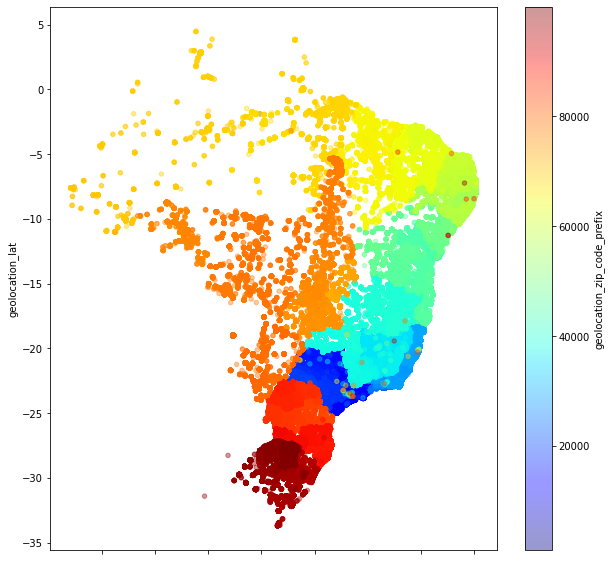

In [355]:
# Visualisation graphique des données géo (latitudes et longitudes) en fonction du code postal associé :

df_geolocation.plot(kind = 'scatter',
                    x = 'geolocation_lng',
                    y = 'geolocation_lat',
                    alpha = 0.4,
                    c = 'geolocation_zip_code_prefix',
                    cmap = plt.get_cmap('jet'),
                    colorbar = True,
                    figsize = (10, 10))
plt.show()

In [356]:
# quelques points qui ont le mauvais zipcode par rapport aux coordonnées...
# to do -> essayer de les supprimée ? ou des les rectifier ?

# encore quelques points un peu éloignés au Nord -> vérifier coordonnées du Brésil
# - update -> c'est bon, les points au Nord sont bien situés au Brésil - état du Nord semble donc moins réprésenté dans les données

In [357]:
########## DUPLICATS ##########

# nombre de duplicats dans le jeu de données
print(f'Nombre de duplicats dans le jeu de données geolocation avant processing: {df_geolocation.duplicated().sum()}')

# supprimer duplicats
print('****** Suppression des duplicats en cours ******')
df_geolocation = df_geolocation.drop_duplicates()

# nombre de duplicats dans le jeu de données après processing
print(f'Nombre de duplicats dans le jeu de données geolocation après processing: {df_geolocation.duplicated().sum()}')

Nombre de duplicats dans le jeu de données geolocation avant processing: 261822
****** Suppression des duplicats en cours ******
Nombre de duplicats dans le jeu de données geolocation après processing: 0


In [358]:
df_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.54562,-46.63929,sao paulo,SP
1,1046,-23.54608,-46.64482,sao paulo,SP
2,1046,-23.54613,-46.64295,sao paulo,SP
3,1041,-23.54439,-46.63950,sao paulo,SP
4,1035,-23.54158,-46.64161,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.18066,-52.03437,agua santa,RS
1000156,99950,-28.07219,-52.01127,tapejara,RS
1000157,99950,-28.06886,-52.01296,tapejara,RS
1000158,99950,-28.06864,-52.01071,tapejara,RS


In [359]:
df_geolocation.loc[df_geolocation['geolocation_city'] == 'agua santa']

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
999754,99965,-28.17389,-52.03845,agua santa,RS
999755,99965,-28.17843,-52.03526,agua santa,RS
999933,99965,-28.21084,-52.05993,agua santa,RS
999949,99965,-28.18171,-52.03559,agua santa,RS
1000067,99965,-28.17470,-52.03551,agua santa,RS
1000155,99965,-28.18066,-52.03437,agua santa,RS


In [360]:
df_geolocation.loc[df_geolocation['geolocation_city'] == 'sao paulo']

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.54562,-46.63929,sao paulo,SP
1,1046,-23.54608,-46.64482,sao paulo,SP
2,1046,-23.54613,-46.64295,sao paulo,SP
3,1041,-23.54439,-46.63950,sao paulo,SP
4,1035,-23.54158,-46.64161,sao paulo,SP
...,...,...,...,...,...
207050,8450,-23.54767,-46.39002,sao paulo,SP
207052,8450,-23.54707,-46.39109,sao paulo,SP
207053,8473,-23.57269,-46.39424,sao paulo,SP
207054,8411,-23.55594,-46.41391,sao paulo,SP


In [361]:
# plusieurs zip code par ville, mais une seule ville par zipcode

In [362]:
# attention -> plusieurs orthographes pour les villes
df_geolocation['geolocation_city'].value_counts()

sao paulo            79927
rio de janeiro       35177
são paulo            19718
belo horizonte       19474
curitiba             11263
                     ...  
são joão do oeste        1
mondaí                   1
tunápolis                1
vertente do lerio        1
araçagi                  1
Name: geolocation_city, Length: 8006, dtype: int64

In [363]:
# exemple: sao paulo & são paulo
# supprimer les accents pour être tranquille :

df_geolocation['geolocation_city'] = df_geolocation['geolocation_city'].str.normalize('NFKD').str.encode('ascii', errors = 'ignore').str.decode('utf-8')
df_geolocation['geolocation_city'].value_counts()

sao paulo         99646
rio de janeiro    35177
belo horizonte    19474
curitiba          11263
brasilia           8791
                  ...  
paqueta               1
tabai                 1
martinesia            1
tapuirama             1
silvano               1
Name: geolocation_city, Length: 5964, dtype: int64

In [364]:
# regarder nombre de zip code par ville et nb de villes par états (genre de heatmap avec cercles)

# MOCHE - A REFAIRE
"""
df_geolocation.plot(kind = 'scatter',
                    x = 'geolocation_lng',
                    y = 'geolocation_lat',
                    alpha = 0.4,
                    s = df_geolocation['geolocation_zip_code_prefix'],
                    label = 'geolocation_zip_code_prefix',
                    #c = df_geolocation['geolocation_city'],
                    cmap = plt.get_cmap('jet'),
                    colorbar = True,
                    figsize = (12, 8))
plt.show()"""

"\ndf_geolocation.plot(kind = 'scatter',\n                    x = 'geolocation_lng',\n                    y = 'geolocation_lat',\n                    alpha = 0.4,\n                    s = df_geolocation['geolocation_zip_code_prefix'],\n                    label = 'geolocation_zip_code_prefix',\n                    #c = df_geolocation['geolocation_city'],\n                    cmap = plt.get_cmap('jet'),\n                    colorbar = True,\n                    figsize = (12, 8))\nplt.show()"

In [365]:
# Granularité du jeu de données : state > city > zip code

In [366]:
df_geolocation.loc[df_geolocation['geolocation_zip_code_prefix'] == 1037]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.54562,-46.63929,sao paulo,SP
14,1037,-23.54519,-46.63786,sao paulo,SP
31,1037,-23.54670,-46.64034,sao paulo,SP
169,1037,-23.54388,-46.63807,sao paulo,SP
178,1037,-23.54616,-46.63989,sao paulo,SP
236,1037,-23.54388,-46.63807,sao paulo,SP
283,1037,-23.54520,-46.63792,sao paulo,SP
417,1037,-23.54519,-46.63786,sao paulo,SP
420,1037,-23.54672,-46.64028,sao paulo,SP
433,1037,-23.54646,-46.64015,sao paulo,SP


In [367]:
df_geolocation['geolocation_lat'].loc[df_geolocation['geolocation_zip_code_prefix'] == 1037]

0      -23.54562
14     -23.54519
31     -23.54670
169    -23.54388
178    -23.54616
236    -23.54388
283    -23.54520
417    -23.54519
420    -23.54672
433    -23.54646
533    -23.54581
677    -23.54587
700    -23.54434
724    -23.54314
781    -23.54314
874    -23.54493
956    -23.54609
1017   -23.54670
1216   -23.54634
Name: geolocation_lat, dtype: float64

In [368]:
df_geolocation['geolocation_lat'].loc[df_geolocation['geolocation_zip_code_prefix'] == 1037].mean()

-23.54533514931352

In [369]:
df_geolocation['geolocation_lng'].loc[df_geolocation['geolocation_zip_code_prefix'] == 1037]

0      -46.63929
14     -46.63786
31     -46.64034
169    -46.63807
178    -46.63989
236    -46.63807
283    -46.63792
417    -46.63786
420    -46.64028
433    -46.64015
533    -46.63960
677    -46.63969
700    -46.63835
724    -46.63761
781    -46.63761
874    -46.63829
956    -46.63976
1017   -46.64034
1216   -46.63996
Name: geolocation_lng, dtype: float64

In [370]:
df_geolocation['geolocation_lng'].loc[df_geolocation['geolocation_zip_code_prefix'] == 1037].mean()

-46.63899521271492

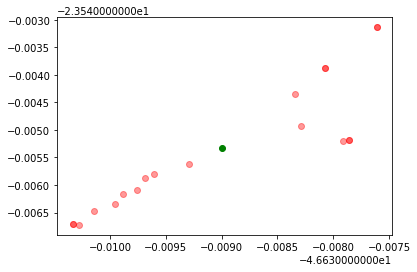

In [371]:
# test en remplaçant coordonnées par moyenne
x_zip = df_geolocation['geolocation_lng'].loc[df_geolocation['geolocation_zip_code_prefix'] == 1037]
y_zip = df_geolocation['geolocation_lat'].loc[df_geolocation['geolocation_zip_code_prefix'] == 1037]

# Visualisation graphique des zip_code_prefix, des latitudes et longitudes associées
plt.figure()
plt.scatter(x = x_zip,
                    y = y_zip,
                    alpha = 0.4,
                    c = 'red')

plt.scatter(x = x_zip.mean(), y = y_zip.mean(), c = 'green')
plt.show()

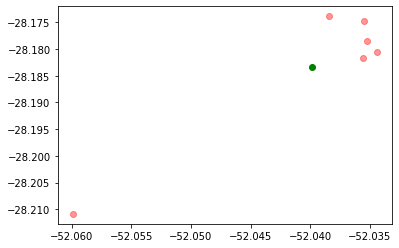

In [372]:
# test avec un autre zip code
x_zip = df_geolocation['geolocation_lng'].loc[df_geolocation['geolocation_zip_code_prefix'] == 99965]
y_zip = df_geolocation['geolocation_lat'].loc[df_geolocation['geolocation_zip_code_prefix'] == 99965]

plt.figure()
plt.scatter(x = x_zip,
            y = y_zip,
            alpha = 0.4,
            c = 'red')
plt.scatter(x = x_zip.mean(),
            y = y_zip.mean(),
            c = 'green')
plt.show()

In [373]:
# impossible de merger geoloc aux autres df (sellers et customers) car plusieurs coordonnées par zip code/villes...
# pas la même granularité entre les df donc besoin de merger

In [374]:
df_geolocation.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [375]:
# groupby et remplacer par mean
df_geo = df_geolocation.groupby(['geolocation_zip_code_prefix'], as_index = False).agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean',
    'geolocation_city': 'first',
    'geolocation_state' :'first'
})

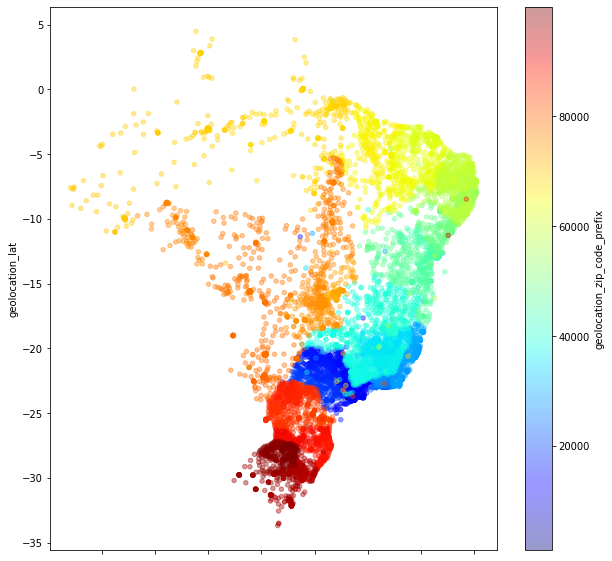

In [376]:
df_geo.plot(kind = 'scatter',
            x = 'geolocation_lng',
            y = 'geolocation_lat',
            alpha = 0.4,
            c = 'geolocation_zip_code_prefix',
            cmap = plt.get_cmap('jet'),
            colorbar = True,
            figsize = (10, 10))
plt.show()

### 3 - Order items dataset

In [377]:
# This dataset includes data about the items purchased within each order.

df_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [378]:
# order_id -> order unique id
# order_item_id -> nb of items by order
# product_id -> product unique id
# seller_id -> seller unique id
# shipping_limit_date -> shipping limit date (for the seller)
# price -> item price
# freight_value -> item freight value (si plusieurs items par commande, freight value splitté entre les items)

In [379]:
df_order_items['order_item_id'].value_counts()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: order_item_id, dtype: int64

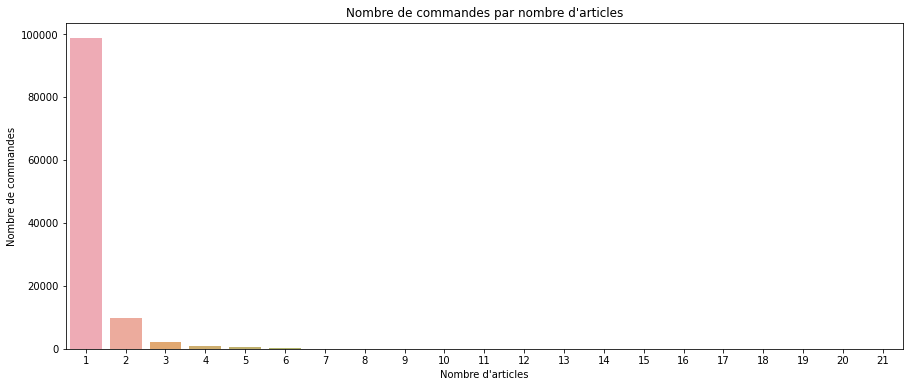

In [380]:
# Nombre d'articles par commande
plt.figure(figsize = (15, 6))
sns.barplot(y = df_order_items['order_item_id'].value_counts(),
            x = df_order_items['order_item_id'].value_counts().index,
            alpha = 0.8)
plt.title("Nombre de commandes par nombre d'articles")
plt.xlabel("Nombre d'articles")
plt.ylabel("Nombre de commandes")
plt.show()

In [381]:
# la plupart des commandes -> 1 seul article

### 4 - Order payments dataset

In [382]:
# This dataset includes data about the orders payment options

# Aperçu des données
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [383]:
# order_id -> unique ID of an order
# payment_sequential -> nb de méthodes de paiement
# payment_type -> méthode de paiement
# payment_installments -> nb of installments chosen by the customer (paiement en plusieurs fois)
# payment_value -> transaction value

In [384]:
df_order_payments['payment_sequential'].value_counts()[:5]

1    99360
2     3039
3      581
4      278
5      170
Name: payment_sequential, dtype: int64

In [385]:
# La majorité des paiements se fait en une fois

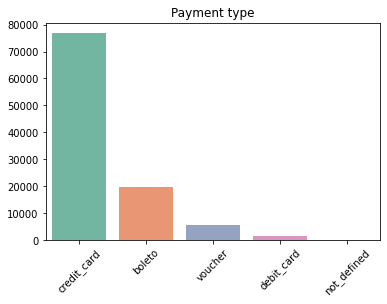

In [386]:
# Type de paiement
order_status = df_order_payments['payment_type'].value_counts()
sns.barplot(x = order_status.index, y = order_status.values)
plt.title('Payment type')
plt.xticks(rotation = 45)
plt.show()

In [387]:
# 5 types de paiement différents
# Boleto = moyen de payment en espèce

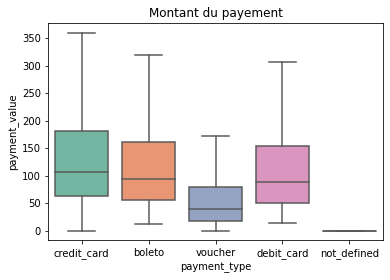

In [388]:
# Boxplot - type de paiement

plt.figure()
sns.boxplot(data = df_order_payments,
            y = 'payment_value',
            x = 'payment_type',
            showfliers = False)
plt.title('Montant du payement')
plt.show()

In [389]:
# 'Not defined' -> 3 lignes

display(df_order_payments.loc[df_order_payments['payment_type'] == 'not_defined'])

# à dropper pour simplifier et nettoyer un peu les données
df_order_payments = df_order_payments.loc[df_order_payments['payment_type'] != 'not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


### 5 - Order reviews dataset

In [390]:
# This dataset includes data about the reviews made by the customers

# Aperçu des données
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [391]:
# review_id -> unique review id
# order_id -> unique order id
# review_score -> de 1 à 5
# review_comment_title -> titre du commentaire (en portugais)
# review_comment_message -> commentaire (en portugais)
# review_creation_date -> date à laquelle le questionnaire de satisfaction a été envoyé au client
# review_answer_timestamp -> date de complétion du questionnaire de satisfaction par le client

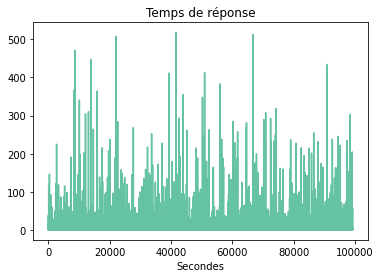

In [392]:
# délai d'évaluation des produits

delay_reponse = (pd.to_datetime(df_order_reviews['review_answer_timestamp']) - pd.to_datetime(df_order_reviews['review_creation_date'])).dt.total_seconds()/(3600*24)
delay_reponse

# Histogramme du délai d'évaluation des produits

plt.figure()
sns.lineplot(data = delay_reponse) # TO DO -> MOCHE, A ARRANGER
plt.xlabel('Secondes')
plt.title('Temps de réponse')
plt.show()

In [393]:
# quelques commentaires manquants -> faire variable bool (commentaire présent/absent)
# (cf. section feature engineering plus bas)

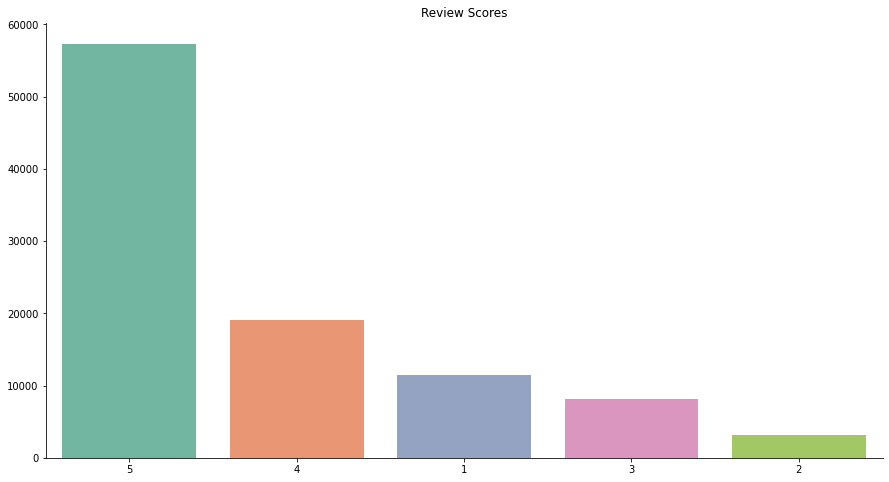

In [394]:
# Distribution des scores de reviews
plt.figure(figsize = (15, 8))
review_score_index = [str(i) for i in df_order_reviews['review_score'].value_counts().index]
sns.barplot(x = review_score_index, y = df_order_reviews['review_score'].value_counts().values, palette = 'Set2')
plt.title('Review Scores')
sns.despine()

### 6 - Orders dataset

In [395]:
# "Core" dataset

# Aperçu des données
df_orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
46191,62b70e70c218b9d5a4d9b7ee14c286f3,df05cc416941cb23623ea7c27a1f87c9,delivered,2017-12-08 14:36:45,2017-12-08 14:49:21,2017-12-12 01:59:28,2018-01-13 02:33:53,2018-01-03 00:00:00
88863,104a4ed42832085322a2ef0d1649b284,c9de6921188c1882c48bb6ed884809b7,delivered,2018-05-10 11:17:51,2018-05-10 11:51:42,2018-05-11 15:31:00,2018-05-18 15:13:00,2018-06-05 00:00:00
53031,162cf02f9877cddb71e0bb217b585128,85c91511ec9c1b687e1c41fddf3ed4c9,delivered,2018-08-02 21:00:24,2018-08-03 08:15:29,2018-08-03 16:04:00,2018-08-20 19:32:28,2018-09-10 00:00:00
81225,f3b592ea0db671d3d1977e043d2a1b10,77a1d41eb75de0bdf44e9791798dd8c2,delivered,2017-11-17 22:40:07,2017-11-17 22:50:50,2017-11-21 14:27:37,2017-12-10 15:52:29,2017-12-15 00:00:00
94132,db487d71157d986ff993d6afc5de6ea5,06323ee39c5605bd9e243f9aacdcbae7,delivered,2017-10-17 08:20:36,2017-10-17 17:46:48,2017-10-18 15:14:09,2017-10-26 17:43:14,2017-11-07 00:00:00


In [396]:
# order_id -> unique id of the order
# customer_id -> key to the customer dataset
# order_status -> status de la commande
# order_purchase_timestamp -> date d'achat
# order_approved_at -> date d'acceptation du paiment
# order_delivered_carrier_date -> date à laquelle la commande confiée au service de livraison
# order_delivered_customer_date -> date de livraison
# order_estimated_delivery_date -> date de livraison estimée indiquée au client lors de l'achat

In [397]:
# idée -> regarder delta entre date de livraison estimée et effective - regarder correlation avec note review

In [398]:
# manque quelques dates - regarder où

df_orders.loc[df_orders['order_delivered_customer_date'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [399]:
# to do -> voir s'il y a un lien entre ces commandes

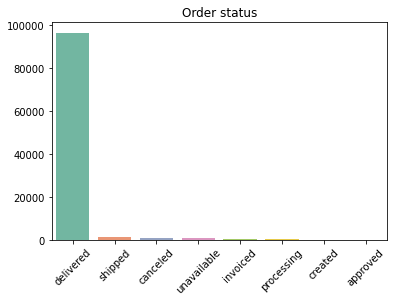

In [400]:
# Nombre de commandes par statuts d'achats
order_status = df_orders['order_status'].value_counts()
sns.barplot(x = order_status.index, y = order_status.values)
plt.title('Order status')
plt.xticks(rotation = 45)
plt.show()

In [401]:
# Suppression des commandes 'canceled' ? ou les concerver ?
df_orders = df_orders[df_orders['order_status'] != 'canceled']

# enlever aussi commandes 'created' ?
# autre idée -> ne garder que les commandes livrées ?

### 7 - Products dataset

In [402]:
# This dataset includes data about the products sold by Olist

# Aperçu des données
df_products.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
12286,09b72772aef83d207e149857fc22dbd3,papelaria,53.0,288.0,1.0,1500.0,20.0,50.0,40.0
26066,0ddc12518a71c5561e6c1054f3816a3e,utilidades_domesticas,41.0,1020.0,1.0,600.0,25.0,15.0,20.0
17766,317a06884480d645d7f0bc82455ec277,informatica_acessorios,59.0,1926.0,5.0,650.0,25.0,11.0,15.0
32803,a155b4eeffbbec8a728eb1ad73705153,moveis_decoracao,60.0,1953.0,1.0,800.0,69.0,11.0,11.0
2523,7b5d8be0e04080e4c8ee6a7ec2f1f597,moveis_decoracao,50.0,830.0,1.0,650.0,20.0,35.0,20.0


In [403]:
# product_id
# product_category_name (en portugais)
# product_name_lenght
# product_description_lenght
# product_photos_qty
# product_weight_g
# product_length_cm
# product_height_cm
# product_width_cm

In [404]:
# combien de catégories de produits ?
df_products['product_category_name'].value_counts() # -> 73 catégories de produits

cama_mesa_banho                                   3029
esporte_lazer                                     2867
moveis_decoracao                                  2657
beleza_saude                                      2444
utilidades_domesticas                             2335
automotivo                                        1900
informatica_acessorios                            1639
brinquedos                                        1411
relogios_presentes                                1329
telefonia                                         1134
bebes                                              919
perfumaria                                         868
papelaria                                          849
fashion_bolsas_e_acessorios                        849
cool_stuff                                         789
ferramentas_jardim                                 753
pet_shop                                           719
eletronicos                                        517
construcao

### 8 - Sellers dataset

In [405]:
# This dataset includes data about the sellers that fulfilled orders made at Olist. Use it to find the seller
# location and to identify which seller fulfilled each product

# Aperçu des données
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [406]:
# seller_id
# seller_zip_code_prefix
# seller_city
# seller_state

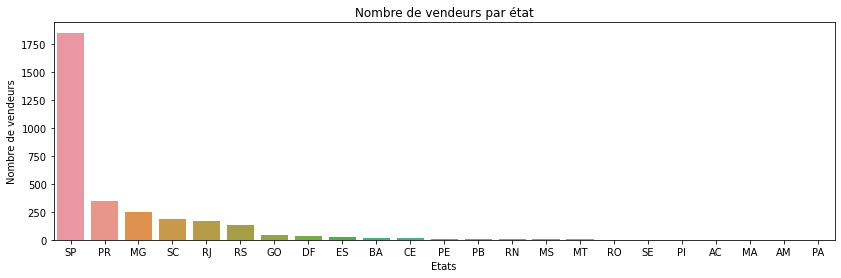

In [407]:
# Visualisation du nombre de vendeurs dans les différents états
plt.figure(figsize = (14, 4))
sns.barplot(y = df_sellers['seller_state'].value_counts(),
            x = df_sellers['seller_state'].value_counts().index)
plt.title('Nombre de vendeurs par état')
plt.xlabel('Etats')
plt.ylabel('Nombre de vendeurs')
plt.show()

In [408]:
# grande majorité des vendeurs sont à SP (São Paulo)

### 9 - Product category name translation

In [409]:
# Translates the product_category_name to english

# Aperçu des données
df_product_category.sample(5)

,product_category_name,product_category_name_english
27,construcao_ferramentas_jardim,costruction_tools_garden
53,pcs,computers
47,moveis_quarto,furniture_bedroom
29,pet_shop,pet_shop
28,fashion_roupa_masculina,fashion_male_clothing


In [410]:
# Données manquantes
df_product_category.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

## Liens entre datasets

## Merge

In [411]:
# utiliser le dataset orders et merger les autres datasets dessus

# Datasets :
#df_customers
#df_geolocation
#df_order_items
#df_order_payments
#df_order_reviews
#df_orders
#df_products
#df_sellers
#df_product_category

In [412]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [413]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [414]:
# 1 - merge sellers avec coordonnées geo

# renommer colonnes df sellers pour faciliter merge
df_sellers.columns = ['seller_id', 'geolocation_zip_code_prefix', 'seller_city', 'seller_state']

# merge
df_sellers_geo = pd.merge(df_sellers,
                          df_geo,
                          how = 'left',
                          on = ['geolocation_zip_code_prefix', 'geolocation_zip_code_prefix'])

# Suppression de la colonne 'geolocation_zip_code_prefix'
df_sellers_geo.drop(columns = ['geolocation_zip_code_prefix',
                               'geolocation_city',
                               'geolocation_state'
                              ], inplace = True)

# renommer colonnes
df_sellers_geo.columns = ['seller_id', 'seller_city', 'seller_state', 'seller_geolocation_lat', 'seller_geolocation_lng']

df_sellers_geo.sample(5)

,seller_id,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng
1229,ce69a8021d18961dd2a40269b7c2c293,curitiba,PR,-25.48296,-49.30348
2051,038b75b729c8a9a04b0d07cba7eabe86,sao jose dos campos,SP,-23.22357,-45.88220
788,d26aa40b90272d4843d63be7c1462c8d,sao paulo,SP,-23.53747,-46.57893
228,9d69ba0a7a626a64dc5db08e529559cf,ribeirao preto,SP,-21.14061,-47.79094
1852,1dd33b8119b3cb1056ed5dc88cd0aaf4,sao paulo,SP,-23.62772,-46.69614


In [415]:
# 2 - merge sellers avec order items

nb_sellers = df_sellers_geo['seller_id'].nunique()
print(f'Nombre de sellers avant merge : {nb_sellers}')

nb_sellers_items = df_order_items['seller_id'].nunique()
print(f'Nombre de sellers dans items avant merge : {nb_sellers_items}')

nb_order_items = df_order_items['order_id'].nunique()
print(f'Nombre de commandes dans items avant merge : {nb_order_items}')

sellers_and_items = pd.merge(df_order_items,
                             df_sellers_geo,
                             how = 'left',
                             left_on = ['seller_id'],
                             right_on = ['seller_id'])

nb_sellers_final = sellers_and_items['seller_id'].nunique()
print(f'Nombre de sellers après merge : {nb_sellers_final}')
print(f'{nb_sellers - nb_sellers_final} sellers perdus pendant le merge.')
print(f'{nb_sellers_items - nb_sellers_final} sellers items perdus pendant le merge.')

nb_order_final = sellers_and_items['order_id'].nunique()
print(f'Nombre de commandes après merge : {nb_order_final}')
print(f'{nb_order_items - nb_order_final} order perdus pendant le merge.')

sellers_and_items

Nombre de sellers avant merge : 3095
Nombre de sellers dans items avant merge : 3095
Nombre de commandes dans items avant merge : 98666
Nombre de sellers après merge : 3095
0 sellers perdus pendant le merge.
0 sellers items perdus pendant le merge.
Nombre de commandes après merge : 98666
0 order perdus pendant le merge.


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,volta redonda,SP,-22.49719,-44.12732
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,sao paulo,SP,-23.56575,-46.51910
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,borda da mata,MG,-22.26280,-46.17074
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,franca,SP,-20.55365,-47.38715
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,loanda,PR,-22.92958,-53.13575
...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,itajai,SC,-26.91251,-48.67409
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,sao paulo,SP,-23.53584,-46.64285
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,curitiba,PR,-25.46956,-49.28818
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,sao paulo,SP,-23.63770,-46.69555


In [416]:
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [417]:
# 3 - ajouter infos produits
# merge précédent (sellers_and_items) + df_products

nb_produits = sellers_and_items['product_id'].nunique()
print(f'Nombre de produits dans order items avant merge : {nb_produits}')

nb_produits_df = df_products['product_id'].nunique()
print(f'Nombre de produits dans df produit avant merge : {nb_produits_df}')

nb_order = sellers_and_items['order_id'].nunique()
print(f'Nombre de commandes dans items avant merge : {nb_order}')

sellers_items_products = pd.merge(sellers_and_items,
                                  df_products,
                                  how = 'left',
                                  left_on = ['product_id'],
                                  right_on = ['product_id'])

nb_produits_final = sellers_items_products['product_id'].nunique()
print(f'Nombre de produits après merge : {nb_produits_final}')
print(f'{nb_produits - nb_produits_final} produits perdus pendant le merge.')
print(f'{nb_produits_df - nb_produits_final} infos produits perdus pendant le merge.')

nb_order_final = sellers_items_products['order_id'].nunique()
print(f'Nombre de commandes après merge : {nb_order_final}')
print(f'{nb_order - nb_order_final} order perdus pendant le merge.')

sellers_items_products

Nombre de produits dans order items avant merge : 32951
Nombre de produits dans df produit avant merge : 32951
Nombre de commandes dans items avant merge : 98666
Nombre de produits après merge : 32951
0 produits perdus pendant le merge.
0 infos produits perdus pendant le merge.
Nombre de commandes après merge : 98666
0 order perdus pendant le merge.


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,volta redonda,SP,-22.49719,-44.12732,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,sao paulo,SP,-23.56575,-46.51910,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,borda da mata,MG,-22.26280,-46.17074,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,franca,SP,-20.55365,-47.38715,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,loanda,PR,-22.92958,-53.13575,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,itajai,SC,-26.91251,-48.67409,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,sao paulo,SP,-23.53584,-46.64285,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,curitiba,PR,-25.46956,-49.28818,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,sao paulo,SP,-23.63770,-46.69555,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [418]:
# 4 - ajouter infos produits aux commandes
# merge précédent (sellers_and_items) + df_products

nb_produits = sellers_items_products['product_id'].nunique()
print(f'Nombre de produits dans order items avant merge : {nb_produits}')

nb_order = sellers_items_products['order_id'].nunique()
print(f'Nombre de commandes dans items avant merge : {nb_order}')

nb_order_df = df_orders['order_id'].nunique()
print(f'Nombre de commandes avant merge : {nb_order_df}')

products_orders = pd.merge(df_orders,
                           sellers_items_products,
                           how = 'left',
                           left_on = ['order_id'],
                           right_on = ['order_id'])

nb_produits_final = products_orders['product_id'].nunique()
print(f'Nombre de produits après merge : {nb_produits_final}')
print(f'{nb_produits - nb_produits_final} produits perdus pendant le merge.')

nb_order_final = products_orders['order_id'].nunique()
print(f'Nombre de commandes après merge : {nb_order_final}')
print(f'{nb_order - nb_order_final} order items perdus pendant le merge.')
print(f'{nb_order_df - nb_order_final} order perdus pendant le merge.')

products_orders

Nombre de produits dans order items avant merge : 32951
Nombre de commandes dans items avant merge : 98666
Nombre de commandes avant merge : 98816
Nombre de produits après merge : 32735
216 produits perdus pendant le merge.
Nombre de commandes après merge : 98816
-150 order items perdus pendant le merge.
0 order perdus pendant le merge.


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,maua,SP,-23.68086,-46.44431,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,belo horizonte,SP,-19.80788,-43.98082,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,guariba,SP,-21.36347,-48.22959,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,belo horizonte,MG,-19.83687,-43.92324,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,mogi das cruzes,SP,-23.54153,-46.26215,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112714,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,tupa,SP,-21.93046,-50.49806,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0
112715,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,sao paulo,SP,-23.55395,-46.45326,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0
112716,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,ilicinea,MG,-20.94071,-45.82720,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
112717,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,ilicinea,MG,-20.94071,-45.82720,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0


In [419]:
# 5 - ajouter infos payment aux commandes
# merge précédent (products_orders) + df_order_payments

nb_order = products_orders['order_id'].nunique()
print(f'Nombre de commandes dans order avant merge : {nb_order}')

nb_order_df = df_order_payments['order_id'].nunique()
print(f'Nombre de payments commandes avant merge : {nb_order_df}')

products_orders_payment = pd.merge(products_orders,
                           df_order_payments,
                           how = 'left',
                           left_on = ['order_id'],
                           right_on = ['order_id'])

nb_order_final = products_orders_payment['order_id'].nunique()
print(f'Nombre de commandes après merge : {nb_order_final}')
print(f'{nb_order - nb_order_final} order perdus pendant le merge.')
print(f'{nb_order_df - nb_order_final} order payments perdus pendant le merge.')

products_orders_payment

Nombre de commandes dans order avant merge : 98816
Nombre de payments commandes avant merge : 99437
Nombre de commandes après merge : 98816
0 order perdus pendant le merge.
621 order payments perdus pendant le merge.


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,maua,SP,-23.68086,-46.44431,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,maua,SP,-23.68086,-46.44431,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,maua,SP,-23.68086,-46.44431,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,belo horizonte,SP,-19.80788,-43.98082,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,guariba,SP,-21.36347,-48.22959,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,1.0,credit_card,3.0,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117684,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,tupa,SP,-21.93046,-50.49806,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,1.0,credit_card,3.0,195.00
117685,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,sao paulo,SP,-23.55395,-46.45326,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,1.0,credit_card,5.0,271.01
117686,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,ilicinea,MG,-20.94071,-45.82720,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,1.0,credit_card,4.0,441.16
117687,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2.0,d1c427060a0f73f6b889a5c

In [420]:
# 6 - ajouter infos reviews aux commandes
# merge précédent (products_orders_payment) + df_order_reviews

nb_order = products_orders_payment['order_id'].nunique()
print(f'Nombre de commandes dans order avant merge : {nb_order}')

nb_order_df = df_order_reviews['order_id'].nunique()
print(f'Nombre de reviews commandes avant merge : {nb_order_df}')

products_orders_payment_reviews = pd.merge(products_orders_payment,
                           df_order_reviews,
                           how = 'left',
                           left_on = ['order_id'],
                           right_on = ['order_id'])

nb_order_final = products_orders_payment_reviews['order_id'].nunique()
print(f'Nombre de commandes après merge : {nb_order_final}')
print(f'{nb_order - nb_order_final} order perdus pendant le merge.')
print(f'{nb_order_df - nb_order_final} order reviews perdus pendant le merge.')

products_orders_payment_reviews

Nombre de commandes dans order avant merge : 98816
Nombre de reviews commandes avant merge : 98673
Nombre de commandes après merge : 98816
0 order perdus pendant le merge.
-143 order reviews perdus pendant le merge.


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,maua,SP,-23.68086,-46.44431,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,maua,SP,-23.68086,-46.44431,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,maua,SP,-23.68086,-46.44431,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,belo horizonte,SP,-19.80788,-43.98082,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,guariba,SP,-21.36347,-48.22959,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118388,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,tupa,SP,-21.93046,-50.49806,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,1.0,credit_card,3.0,195.00,29bb71b2760d0f876dfa178a76bc4734,4.0,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01
118389,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:2

In [421]:
df_customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [422]:
df_geo.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

In [423]:
df_customers.columns = [
    'customer_id', 
    'customer_unique_id', 
    'geolocation_zip_code_prefix',
    'customer_city', 
    'customer_state'
    ]

In [424]:
# 7 - customer + geo
df_customers_geo = pd.merge(df_customers, 
                            df_geo, 
                            how = 'left', 
                            on = ['geolocation_zip_code_prefix', 'geolocation_zip_code_prefix'])

# Suppression de la colonne 'geolocation_zip_code_prefix'
df_customers_geo.drop(columns = ['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'], 
                      inplace = True)
df_customers_geo

,customer_id,customer_unique_id,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,-20.49927,-47.39666
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,-23.72840,-46.54225
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,-23.53131,-46.65669
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,-23.50067,-46.18635
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,-22.97571,-47.14314
...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo,SP,-23.58618,-46.49965
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,taboao da serra,SP,-23.61679,-46.76772
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fortaleza,CE,-3.73563,-38.51078
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,canoas,RS,-29.94996,-51.16838


In [425]:
df_customers_geo.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'geolocation_lat', 'geolocation_lng'],
      dtype='object')

In [426]:
# renommer colonnes avant prochain merge
df_customers_geo.columns = [
    'customer_id', 
    'customer_unique_id', 
    'customer_city', 
    'customer_state',
    'customer_geolocation_lat', 
    'customer_geolocation_lng'
    ]

In [427]:
# 8 - lier commandes à leurs clients
# merge précédent (products_orders_payment_reviews) + df_customers

nb_order = products_orders_payment_reviews['order_id'].nunique()
print(f'Nombre de commandes dans order avant merge : {nb_order}')

nb_customer = products_orders_payment_reviews['customer_id'].nunique()
print(f'Nombre de customer dans order avant merge : {nb_order}')

nb_customer_df = df_customers_geo['customer_id'].nunique()
print(f'Nombre de customers avant merge : {nb_order_df}')

df_final = pd.merge(
    df_customers_geo, 
    products_orders_payment_reviews,
    how = 'left',
    left_on = ['customer_id'],
    right_on = ['customer_id']
    )

nb_order_final = df_final['order_id'].nunique()
nb_customer_final = df_final['customer_id'].nunique()
print(f'Nombre de commandes après merge : {nb_order_final}')
print(f'Nombre de customer après merge : {nb_customer_final}')
print(f'{nb_order - nb_order_final} order perdus pendant le merge.')
print(f'{nb_customer - nb_customer_final} customers de order perdus pendant le merge.')
print(f'{nb_customer_df - nb_customer_final} customers perdus pendant le merge.')

df_final

Nombre de commandes dans order avant merge : 98816
Nombre de customer dans order avant merge : 98816
Nombre de customers avant merge : 98673
Nombre de commandes après merge : 98816
Nombre de customer après merge : 99441
0 order perdus pendant le merge.
-625 customers de order perdus pendant le merge.
0 customers perdus pendant le merge.


,customer_id,customer_unique_id,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,-20.49927,-47.39666,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,itaquaquecetuba,SP,-23.48614,-46.36711,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,-23.72840,-46.54225,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,itajai,SC,-26.91251,-48.67409,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,-23.53131,-46.65669,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,itaquaquecetuba,SP,-23.48614,-46.36711,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,-23.50067,-46.18635,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,itaquaquecetuba,SP,-23.48614,-46.36711,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,-22.97571,-47.14314,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,ibitinga,SP,-21.75723,-48.82954,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119013,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo,SP,-23.58618,-46.49965,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,1.0,ccb4503d9d4

In [428]:
df_final

,customer_id,customer_unique_id,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,-20.49927,-47.39666,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,itaquaquecetuba,SP,-23.48614,-46.36711,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,-23.72840,-46.54225,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,itajai,SC,-26.91251,-48.67409,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,-23.53131,-46.65669,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,itaquaquecetuba,SP,-23.48614,-46.36711,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,-23.50067,-46.18635,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,itaquaquecetuba,SP,-23.48614,-46.36711,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,-22.97571,-47.14314,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,ibitinga,SP,-21.75723,-48.82954,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119013,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,sao paulo,SP,-23.58618,-46.49965,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,1.0,ccb4503d9d4

In [429]:
df_final.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'customer_geolocation_lat', 'customer_geolocation_lng', 'order_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'seller_city', 'seller_state', 'seller_geolocation_lat',
       'seller_geolocation_lng', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

## Feature engineering

In [430]:
# identifier potentielles nouvelles variables qui pourraient être interessantes pour la segmentation
# (ne pas en faire trop non plus, modèle doit être explicable quand même)

In [431]:
########## Traduire noms portugais -> anglais ##########

df_final['product_category_name_english'] = df_final['product_category_name'].map(df_product_category.set_index('product_category_name')['product_category_name_english'])
df_final.drop(['product_category_name'], axis = 1, inplace = True)

In [432]:
df_final['product_category_name_english'].unique()

array(['office_furniture', 'housewares', 'home_confort', 'sports_leisure',
       'computers_accessories', nan, 'toys', 'furniture_decor', 'auto',
       'air_conditioning', 'telephony', 'health_beauty', 'garden_tools',
       'pet_shop', 'bed_bath_table', 'baby', 'watches_gifts',
       'kitchen_dining_laundry_garden_furniture', 'perfumery', 'art',
       'stationery', 'fashio_female_clothing', 'consoles_games',
       'construction_tools_lights', 'food_drink', 'drinks', 'cool_stuff',
       'fashion_bags_accessories', 'home_construction',
       'luggage_accessories', 'electronics', 'home_appliances_2',
       'fashion_male_clothing', 'small_appliances',
       'small_appliances_home_oven_and_coffee', 'books_general_interest',
       'home_appliances', 'costruction_tools_tools',
       'signaling_and_security', 'musical_instruments',
       'construction_tools_construction', 'music', 'fashion_shoes',
       'industry_commerce_and_business', 'fashion_underwear_beach',
       'dvds_blu

In [433]:
# Faire nouvelles catégories -> + de 70 actuellement, impossible à utiliser

categories = {
    'Furniture': ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery'],
    'Electronics': ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services'],
    'Fashion': ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff'],
    'Home & Garden': ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place'],
    'Entertainment': ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art', 'books_general_interest', 'books_technical', 'books_imported', 'stationery'],
    'Beauty & Health': ['health_beauty', 'perfumery', 'diapers_and_hygiene'],
    'Food & Drinks': ['food_drink', 'drinks', 'food'],
    'Industry & Construction': ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']
    }

In [434]:
# Réduire les 8 catégories pour n'en garder que 4 :

categories_4 = {
    'Furniture and Home Decor': [
        'office_furniture', 'housewares', 'furniture_decor',
        'kitchen_dining_laundry_garden_furniture', 'bed_bath_table',
        'luggage_accessories', 'furniture_living_room', 'furniture_bedroom',
        'furniture_mattress_and_upholstery'
    ],
    'Electronics and Technology': [
        'computers_accessories', 'telephony', 'electronics',
        'tablets_printing_image', 'fixed_telephony', 'computers', 'audio'
    ],
    'Fashion and Accessories': [
        'fashion_female_clothing', 'fashion_bags_accessories',
        'fashion_male_clothing', 'fashion_shoes', 'fashion_underwear_beach',
        'fashion_sport', 'fashion_childrens_clothes'
    ],
    'Leisure and Miscellaneous': [
        'sports_leisure', 'toys', 'auto', 'health_beauty', 'garden_tools',
        'pet_shop', 'watches_gifts', 'perfumery', 'art', 'stationery',
        'consoles_games', 'construction_tools_lights', 'food_drink', 'drinks',
        'cool_stuff', 'home_construction', 'electronics', 'home_appliances_2',
        'small_appliances', 'small_appliances_home_oven_and_coffee',
        'books_general_interest', 'home_appliances', 'costruction_tools_tools',
        'signaling_and_security', 'musical_instruments',
        'construction_tools_construction', 'music', 'industry_commerce_and_business',
        'fashion_shoes', 'fashion_underwear_beach', 'dvds_blu_ray',
        'construction_tools_safety', 'food', 'fixed_telephony',
        'tablets_printing_image', 'market_place', 'christmas_supplies',
        'agro_industry_and_commerce', 'costruction_tools_garden', 'computers',
        'audio', 'books_imported', 'books_technical', 'party_supplies',
        'la_cuisine', 'flowers', 'diapers_and_hygiene', 'cine_photo',
        'cds_dvds_musicals', 'home_comfort_2', 'arts_and_craftsmanship',
        'security_and_services'
    ]
}

In [435]:
categories_4.items()

dict_items([('Furniture and Home Decor', ['office_furniture', 'housewares', 'furniture_decor', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'luggage_accessories', 'furniture_living_room', 'furniture_bedroom', 'furniture_mattress_and_upholstery']), ('Electronics and Technology', ['computers_accessories', 'telephony', 'electronics', 'tablets_printing_image', 'fixed_telephony', 'computers', 'audio']), ('Fashion and Accessories', ['fashion_female_clothing', 'fashion_bags_accessories', 'fashion_male_clothing', 'fashion_shoes', 'fashion_underwear_beach', 'fashion_sport', 'fashion_childrens_clothes']), ('Leisure and Miscellaneous', ['sports_leisure', 'toys', 'auto', 'health_beauty', 'garden_tools', 'pet_shop', 'watches_gifts', 'perfumery', 'art', 'stationery', 'consoles_games', 'construction_tools_lights', 'food_drink', 'drinks', 'cool_stuff', 'home_construction', 'electronics', 'home_appliances_2', 'small_appliances', 'small_appliances_home_oven_and_coffee', 'books_general_in

In [436]:
categories_4.keys()

dict_keys(['Furniture and Home Decor', 'Electronics and Technology', 'Fashion and Accessories', 'Leisure and Miscellaneous'])

In [437]:
# Reverse dict

inverse = { v: k for k, l in categories_4.items() for v in l }

In [438]:
inverse

{'office_furniture': 'Furniture and Home Decor',
 'housewares': 'Furniture and Home Decor',
 'furniture_decor': 'Furniture and Home Decor',
 'kitchen_dining_laundry_garden_furniture': 'Furniture and Home Decor',
 'bed_bath_table': 'Furniture and Home Decor',
 'luggage_accessories': 'Furniture and Home Decor',
 'furniture_living_room': 'Furniture and Home Decor',
 'furniture_bedroom': 'Furniture and Home Decor',
 'furniture_mattress_and_upholstery': 'Furniture and Home Decor',
 'computers_accessories': 'Electronics and Technology',
 'telephony': 'Electronics and Technology',
 'electronics': 'Leisure and Miscellaneous',
 'tablets_printing_image': 'Leisure and Miscellaneous',
 'fixed_telephony': 'Leisure and Miscellaneous',
 'computers': 'Leisure and Miscellaneous',
 'audio': 'Leisure and Miscellaneous',
 'fashion_female_clothing': 'Fashion and Accessories',
 'fashion_bags_accessories': 'Fashion and Accessories',
 'fashion_male_clothing': 'Fashion and Accessories',
 'fashion_shoes': 'Leis

In [439]:
df_final['product_category'] = df_final['product_category_name_english'].map(inverse)
df_final.drop(['product_category_name_english'], axis = 1, inplace = True)

df_final['product_category'].value_counts()

Leisure and Miscellaneous     64805
Furniture and Home Decor      32024
Electronics and Technology    12811
Fashion and Accessories        2347
Name: product_category, dtype: int64

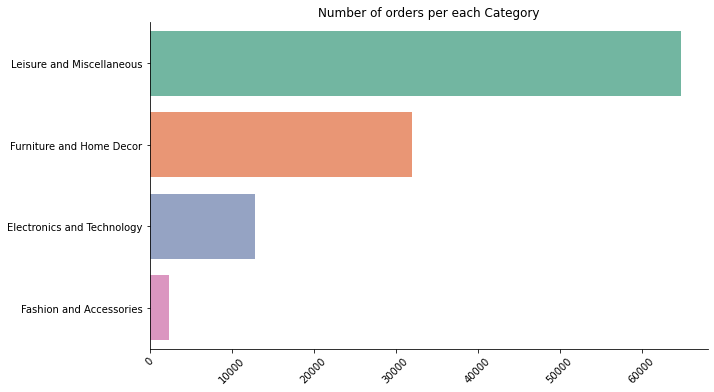

In [440]:
plt.figure(figsize = (10, 6))
sns.barplot(x = df_final['product_category'].value_counts().values, y = df_final['product_category'].value_counts().index, palette = 'Set2')
plt.title('Number of orders per each Category')
plt.xticks(rotation = 45)
sns.despine()

In [441]:
# résultat franchement desequilibré...

In [442]:
# (WIP) Drop inconsistent dates where "order_delivered_carrier_date" is greater than "order_delivered_customer_date"
# mettre shipping limit date en datetime avant
#df_final.drop((df_final[['order_delivered_carrier_date', 'order_delivered_customer_date']][df_final['shipping_limit_date'] < 0]).index, inplace = True)

In [443]:
# (WIP) - idem que cellule précédante, passer dates str -> dt
"""
# Shipping stat  S <-> C
# First get seller to carrier duration in days and classify the duration into 'OnTime/Early' & 'Late'
df_final['seller_to_carrier_status'] = np.where((df_final['shipping_limit_date'] - df_final['order_delivered_carrier_date']).dt.days >= 0, 'OnTime/Early', 'Late')
# First get difference between estimated delivery date and actual delivery date in days and classify the duration in 'OnTime/Early' & 'Late'
df_final['arrival_status'] = np.where((df_final['order_estimated_delivery_date'] - df_final['order_delivered_customer_date']).dt.days >= 0, 'OnTime/Early', 'Late')
"""

"\n# Shipping stat  S <-> C\n# First get seller to carrier duration in days and classify the duration into 'OnTime/Early' & 'Late'\ndf_final['seller_to_carrier_status'] = np.where((df_final['shipping_limit_date'] - df_final['order_delivered_carrier_date']).dt.days >= 0, 'OnTime/Early', 'Late')\n# First get difference between estimated delivery date and actual delivery date in days and classify the duration in 'OnTime/Early' & 'Late'\ndf_final['arrival_status'] = np.where((df_final['order_estimated_delivery_date'] - df_final['order_delivered_customer_date']).dt.days >= 0, 'OnTime/Early', 'Late')\n"

In [444]:
########## DATES ##########

# 'order_purchase_timestamp'
# 'order_approved_at'
# 'order_delivered_carrier_date'
# 'order_delivered_customer_date'
# 'order_estimated_delivery_date'
# 'shipping_limit_date'
# 'review_creation_date'
# 'review_answer_timestamp'

# convertir en dt
dates_to_convert = ['review_answer_timestamp',
                    'review_creation_date',
                    'order_purchase_timestamp',
                    'order_delivered_customer_date',
                    'order_estimated_delivery_date',
                    'order_delivered_carrier_date',
                    'order_approved_at',
                    'shipping_limit_date']

for x in dates_to_convert:
    df_final[x] = pd.to_datetime(df_final[x])

# créer les nouvelles features :
# - delta entre date envoi questionnaire satisfaction et réponse (pour avoir vitesse de réponse)
df_final['review_time'] = (df_final['review_answer_timestamp'] - df_final['review_creation_date']).dt.total_seconds()/(3600*24)

# - delta entre date d'achat et date effective de livraison
df_final['order_time'] = (df_final['order_delivered_customer_date'] - df_final['order_purchase_timestamp']).dt.total_seconds()/(3600*24)

# - delta entre livraison estimée et livraison effective
df_final['delivery_error_time'] = (df_final['order_delivered_customer_date'] - df_final['order_estimated_delivery_date']).dt.total_seconds()/(3600*24)

# - delta envoi de la commande par le vendeur (temps de préparation de la commande)
df_final['order_preparation_time'] = (df_final['order_delivered_carrier_date'] - df_final['order_approved_at']).dt.total_seconds()/(3600*24)

# - temps de livraison
df_final['delivery_time'] = (df_final['order_delivered_customer_date'] - df_final['order_delivered_carrier_date']).dt.total_seconds()/(3600*24)

# - est ce que le vendeur a dépassé le shipping limit date ou non ?
df_final['shipping_limit_respect'] = (df_final['shipping_limit_date'] - df_final['order_delivered_carrier_date']).dt.total_seconds()/(3600*24)

# drop features qui ne nous intéressent plus
df_final.drop(['review_answer_timestamp',
                    'review_creation_date',
                    'order_delivered_customer_date',
                    'order_estimated_delivery_date',
                    'order_delivered_carrier_date',
                    'order_approved_at',
                    'shipping_limit_date'], axis = 1, inplace = True)

# Ajout heure, jour, mois de l'achat
df_final['purchase_time']  = pd.to_datetime(df_final['order_purchase_timestamp'])
df_final['purchase_year'] = df_final['purchase_time'].dt.year
df_final['purchase_month'] = df_final['purchase_time'].dt.month
df_final['purchase_dayofweek'] = df_final['purchase_time'].dt.dayofweek
df_final['purchase_day'] = df_final['purchase_time'].dt.day
df_final['purchase_hour'] = df_final['purchase_time'].dt.hour

In [445]:
df_final['purchase_year'].unique()

array([2017., 2018.,   nan, 2016.])

In [446]:
########### REVIEWS ##########

df_final.loc[df_final['review_comment_message'].isna()]

# new feature -> review text oui/non

df_final['full_written_review'] = 1
df_final['full_written_review'].loc[df_final['review_comment_message'].isna()] = 0

df_final['written_review_title'] = 1
df_final['written_review_title'].loc[df_final['review_comment_title'].isna()] = 0

# drop les titres et textes des reviews (en portugais)
df_final.drop(['review_comment_title', 'review_comment_message'], axis = 1, inplace = True)

In [447]:
########### VOLUME (cm3) ##########
# volume = height*lenght*width (va permettre de passer de 3 variables à 1)

df_final['product_volume_cm3'] = df_final['product_length_cm'] \
                               * df_final['product_height_cm'] \
                               * df_final['product_width_cm']

df_final.drop(['product_length_cm', 'product_height_cm', 'product_width_cm'], axis = 1, inplace = True)

In [448]:
# frequence des commandes

# 2 ans de données -> prendre fréquence sur 6 mois ? ou prendre sur toutes les données ?

In [449]:
# https://blog.smile.io/how-to-calculate-purchase-frequency/

# customer order frequency = purchase frequency
# number of times that your customers make a purchase from you within a specified period of time

# Repeat Purchase Rate (RPR)
# = number of customers who bought more than once (365 days) divided by number of customers (365 days)

# Purchase Frequency (PF)
# = number of orders (365 days) divided by number of unique customers (365 days)

# Time Between Purchases (TBP)
# = 365 days divided by purchase frequency

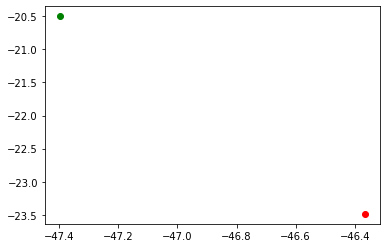

In [450]:
# plotter customer et seller -> TO DO -> VOIR SI J'ARRIVE A FAIRE  (parce que un peu moisi en l'état)

plt.figure()
plt.scatter(x = df_final['seller_geolocation_lng'][0], y = df_final['seller_geolocation_lat'][0], c = 'red') # sellers
plt.scatter(x = df_final['customer_geolocation_lng'][0], y = df_final['customer_geolocation_lat'][0], c = 'green') # customers
plt.show()

In [451]:
########### DISTANCE VENDEUR - ACHETEUR (km) ##########
# Calculer distance en km entre vendeur et acheteur

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

# calcul de la distance
df_final['distance'] = df_final.apply(lambda x: haversine(x['seller_geolocation_lat'],
                                                          x['seller_geolocation_lng'],
                                                          x['customer_geolocation_lat'],
                                                          x['customer_geolocation_lng']) * 0.90, axis = 1)

# droper coordonnées (car ne sera plus utile)
df_final.drop(['seller_geolocation_lat', 'seller_geolocation_lng', 'customer_geolocation_lat', 'customer_geolocation_lng'], axis = 1, inplace = True)

In [452]:
df_final.sample(6)

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,price,freight_value,seller_city,seller_state,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,product_category,review_time,order_time,delivery_error_time,order_preparation_time,delivery_time,shipping_limit_respect,purchase_time,purchase_year,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,full_written_review,written_review_title,product_volume_cm3,distance
46524,50a19a2bbbc9fe086f09ccd05b51ffa7,5036f4227f2e546879f581d8fd3e6ec6,monte aprazivel,SP,6f1a8d85b71101ab1e342aa9b8dfa5ff,delivered,2017-07-29 15:38:49,1.0,5fda5f5969ed8a446022953a89e1c81a,1b8356dabde1d35e17cef975c3f82730,52.99,12.71,sao paulo,SP,56.0,1031.0,2.0,800.0,1.0,credit_card,4.0,46.80,b6a02a8de3d5169e1429b84ebe4cd8c0,4.0,Furniture and Home Decor,3.72022,11.23362,-11.11442,3.02536,8.20028,2.97464,2017-07-29 15:38:49,2017.0,7.0,5.0,29.0,15.0,1,0,16000.0,370.73230
3729,dcb065ef99fbfdb1655f384e3cb338e7,eceb1256610892e77f328ca3d8a54dee,presidente epitacio,SP,2beb6e42ebac795d47860b9e7afdbaa2,delivered,2018-06-28 15:49:48,1.0,f63729cf4441fe64282cd1b82281792d,70eea00b476a314817cefde4aad4f89a,209.90,18.60,itatiba,SP,60.0,1358.0,7.0,2150.0,1.0,credit_card,3.0,228.50,6374665e9a62f4b5d5a3c4b289d8ac97,5.0,Leisure and Miscellaneous,1.71541,6.26990,-14.07052,0.91477,5.34059,4.08523,2018-06-28 15:49:48,2018.0,6.0,3.0,28.0,15.0,1,1,9240.0,534.35914
31345,03e454af33e93cda33e1b22175ab8361,d05013504cc471a973af3e91dc6b52fe,rio de janeiro,RJ,36b7b9c89099230dbecdcde16e84c1cd,delivered,2018-03-27 18:22:21,1.0,7f064525eaaa1ce9d22c085f7ff5413a,6560211a19b47992c3666cc44a7e94c0,49.00,15.23,sao paulo,SP,50.0,578.0,3.0,250.0,1.0,credit_card,8.0,108.46,f8f7f02bb2354462e17705268f1e6d52,5.0,Leisure and Miscellaneous,1.53588,6.85344,-23.38104,1.13650,5.70794,4.86350,2018-03-27 18:22:21,2018.0,3.0,1.0,27.0,18.0,1,0,640.0,362.73635
18040,1ea8e45ffebf367b2f046c8b3c8ff230,bc5b38c4913692426b92b0d40a6ddc1f,sao paulo,SP,72af7514238e36c16453f0a9146ecb52,delivered,2017-12-01 15:40:46,1.0,1a300f482e35d7eac74b229be067aefd,e9d99831abad74458942f21e16f33f92,19.99,8.72,sao paulo,SP,54.0,333.0,4.0,125.0,1.0,credit_card,2.0,28.71,79d72132163a3447176d7731bd57e1b6,4.0,Electronics and Technology,0.85418,10.05413,-7.29256,1.30317,6.75439,2.69683,2017-12-01 15:40:46,2017.0,12.0,4.0,1.0,15.0,0,0,1890.0,11.74800
86862,a6c9cacb399083fbf6497249c9d3a140,52ca43132ea5c0f2805b1537bb841857,rio de janeiro,RJ,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN
55916,4aa0005ef4b8cb5ce874a4a86b36ed05,788a2f679187362222b67dfe89da6c1a,sao paulo,SP,52eb8ce94864a3bb1be410a545f9ed4c,delivered,2017-11-24 23:37:20,1.0,20d458d013a3988f71009298fecd8607,d2374cbcbb3ca4ab1086534108cc3ab7,17.90,11.85,ibitinga,SP,43.0,114.0,1.0,300.0,2.0,voucher,1.0,59.92,452c58e6ab8609f53592745a76557ca8,1.0,Furniture and Home Decor,1.86882,9.85556,-13.16019,5.52191,4.24950,3.47809,2017-11-24 23:37:20,2017.0,11.0,4.0,24.0,23.0,0,0,4800.0,246.11160


In [453]:
# evolution du nb de commandes par mois (WIP)
"""df_final_plot = df_final

df_final_plot['purchase_month'] = df_final_plot['purchase_month'].astype('int')"""

"df_final_plot = df_final\n\ndf_final_plot['purchase_month'] = df_final_plot['purchase_month'].astype('int')"

In [454]:
# Group by month and count the number of orders
orders_by_month = df_final.groupby(['purchase_month'])['order_id'].count()
orders_by_month

purchase_month
1.0      9649
2.0     10081
3.0     11795
4.0     11109
5.0     12663
6.0     11216
7.0     12231
8.0     12673
9.0      5172
10.0     6026
11.0     9145
12.0     6633
Name: order_id, dtype: int64

In [455]:
orders_by_month = orders_by_month.tail(-1)

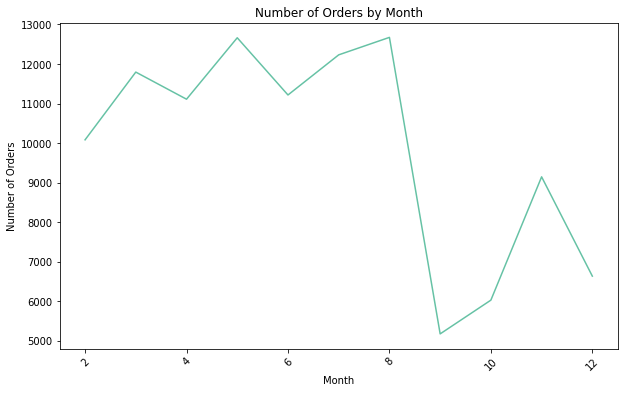

In [456]:
# Plot the data using pointplot
plt.figure(figsize = (10, 6))
sns.lineplot(data = orders_by_month, 
             x = orders_by_month.index, 
             y = orders_by_month.values, 
             markers = True)
plt.title('Number of Orders by Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation = 45)
plt.show()

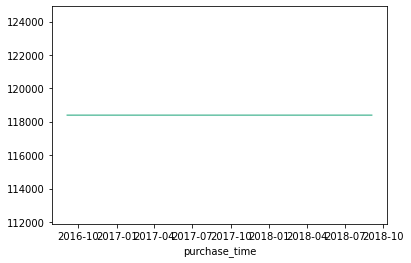

In [457]:
# evolution du nb de commandes

plt.figure()
sns.lineplot(x = df_final['purchase_time'], y = df_final['order_id'].count(), markers = True)
plt.show()

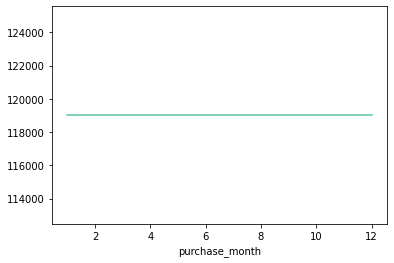

In [458]:
## evolution du nb de clients par mois

plt.figure()
sns.lineplot(x = df_final['purchase_month'], y = df_final['customer_id'].count(), markers = True)
plt.show()

In [459]:
# faire un graph qui regroupe évolution par mois du nb de commandes, du nb de clients et du CA etc
# idem avec toutes les dates

In [460]:
# Export données 'propres' au format pickle pour rfm (garder id etc)

# Chemin d'accès aux données (à modifier si code en local)
#path = '/content/drive/MyDrive/OpenClassrooms/Projet5/' #-> pour colab
path = '' #-> en local

# specifier le chemin choisi
filepath = os.path.join(path, 'df_for_rfm')

# exporter en format pickle
with open(filepath, 'wb') as f:
    pickle.dump(df_final, f)

In [461]:
# Dropper les identifiants (ne seront plus utiles par la suite)

df = df_final.drop(['customer_id', 'customer_unique_id', 'order_id', 'order_item_id', 'product_id', 'seller_id', 'review_id'], axis = 1)
df

,customer_city,customer_state,order_status,order_purchase_timestamp,price,freight_value,seller_city,seller_state,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_type,payment_installments,payment_value,review_score,product_category,review_time,order_time,delivery_error_time,order_preparation_time,delivery_time,shipping_limit_respect,purchase_time,purchase_year,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,full_written_review,written_review_title,product_volume_cm3,distance
0,franca,SP,delivered,2017-05-16 15:05:35,124.99,21.88,itaquaquecetuba,SP,41.0,1141.0,1.0,8683.0,1.0,credit_card,2.0,146.87,4.0,Furniture and Home Decor,4.94074,8.81250,-10.55862,6.80955,1.99141,-0.80955,2017-05-16 15:05:35,2017.0,5.0,1.0,16.0,15.0,0,0,107136.0,228.79538
1,sao bernardo do campo,SP,delivered,2018-01-12 20:48:24,289.00,46.48,itajai,SC,43.0,1002.0,3.0,10150.0,1.0,credit_card,8.0,335.48,5.0,Furniture and Home Decor,11.94686,16.66175,-7.47131,2.84476,13.80995,3.15524,2018-01-12 20:48:24,2018.0,1.0,4.0,12.0,20.0,0,0,53400.0,302.71858
2,sao paulo,SP,delivered,2018-05-19 16:07:45,139.94,17.79,itaquaquecetuba,SP,55.0,955.0,1.0,8267.0,1.0,credit_card,7.0,157.73,5.0,Furniture and Home Decor,0.50763,26.07715,1.74920,21.92488,3.14434,-5.92488,2018-05-19 16:07:45,2018.0,5.0,5.0,19.0,16.0,0,0,45968.0,29.14657
3,mogi das cruzes,SP,delivered,2018-03-13 16:06:38,149.94,23.36,itaquaquecetuba,SP,48.0,1066.0,1.0,12160.0,1.0,credit_card,1.0,173.30,5.0,Furniture and Home Decor,4.77554,14.99846,-12.33027,14.24541,0.69564,-0.28572,2018-03-13 16:06:38,2018.0,3.0,1.0,13.0,16.0,0,0,79968.0,18.11744
4,campinas,SP,delivered,2018-07-29 09:51:30,230.00,22.25,ibitinga,SP,61.0,407.0,1.0,5200.0,1.0,credit_card,8.0,252.25,5.0,NaN,7.08324,11.46132,-5.12792,1.21240,10.23597,0.78760,2018-07-29 09:51:30,2018.0,7.0,6.0,29.0,9.0,1,1,23625.0,187.45960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119013,sao paulo,SP,delivered,2018-04-07 15:48:17,74.90,13.88,garca,SP,51.0,489.0,2.0,611.0,1.0,credit_card,6.0,88.78,4.0,Leisure and Miscellaneous,14.46880,6.17940,-11.16207,3.41656,2.74862,1.58344,2018-04-07 15:48:17,2018.0,4.0,5.0,7.0,15.0,0,1,11132.0,329.23572
119014,taboao da serra,SP,delivered,2018-04-04 08:20:22,114.90,14.16,araraquara,SP,51.0,1193.0,1.0,1211.0,1.0,credit_card,3.0,129.06,5.0,Leisure and Miscellaneous,4.44172,7.44054,-8.21198,1.42179,6.00845,4.57821,2018-04-04 08:20:22,2018.0,4.0,2.0,4.0,8.0,0,0,13200.0,188.57356
119015,fortaleza,CE,delivered,2018-04-08 20:11:50,37.00,19.04,sao paulo,SP,60.0,575.0,1.0,870.0,1.0,credit_card,5.0,56.04,1.0,Leisure and Miscellaneous,4.07022,30.95237,7.79392,0.89044,30.04928,3.10956,2018-04-08 20:11:50,2018.0,4.0,6.0,8.0,20.0,1,1,9000.0,1662.21122
119016,canoas,RS,delivered,2017-11-03 21:08:33,689.00,22.07,guariba,SP,59.0,452.0,1.0,710.0,1.0,credit_card,2.0,711.07,5.0,Leisure and Miscellaneous,2.98215,12.95146,-18.16760,2.87038,10.06525,3.11887,2017-11-03 21:08:33,2017.0,11.0,4.0,3.0,21.0,0,0,3458.0,628.26583


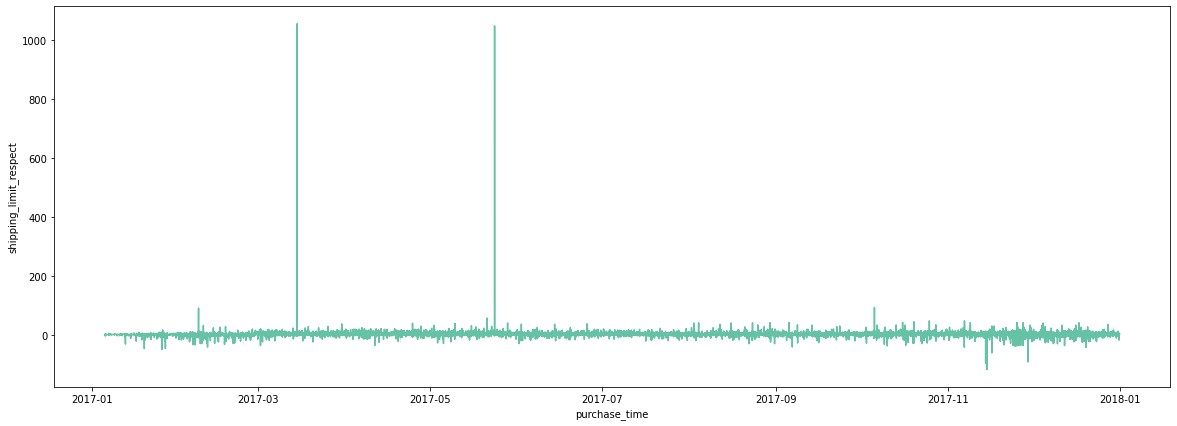

In [462]:
# Ventes de la plateforme par jour du mois

plt.figure(figsize = (20, 7))
sns.lineplot(data = df.loc[df['purchase_year'] == 2017.0], x = 'purchase_time', y = 'shipping_limit_respect', markers = True)
plt.show()

In [463]:
df['shipping_limit_respect'].sort_values(ascending = False)

11689     1054.24453
49852     1046.85532
49851     1046.85532
37989      175.21900
32464       93.44124
             ...    
118593           NaN
118611           NaN
118696           NaN
118698           NaN
118975           NaN
Name: shipping_limit_respect, Length: 119018, dtype: float64

In [464]:
df.loc[df['shipping_limit_respect'] > 200]

,customer_city,customer_state,order_status,order_purchase_timestamp,price,freight_value,seller_city,seller_state,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_type,payment_installments,payment_value,review_score,product_category,review_time,order_time,delivery_error_time,order_preparation_time,delivery_time,shipping_limit_respect,purchase_time,purchase_year,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,full_written_review,written_review_title,product_volume_cm3,distance
11689,brasilia,DF,shipped,2017-03-14 19:23:22,75.99,14.70,jacutinga,MG,48.0,2396.0,2.0,3700.0,1.0,boleto,1.0,90.69,1.0,Furniture and Home Decor,0.91966,NaN,NaN,1.79714,NaN,1054.24453,2017-03-14 19:23:22,2017.0,3.0,1.0,14.0,19.0,1,0,8000.0,NaN
49851,sao jose do rio preto,SP,delivered,2017-05-23 22:28:36,99.99,61.44,jacutinga,MG,58.0,914.0,5.0,15000.0,1.0,credit_card,15.0,322.86,5.0,Furniture and Home Decor,2.55868,16.63007,-123.4334,4.14468,11.48086,1046.85532,2017-05-23 22:28:36,2017.0,5.0,1.0,23.0,22.0,0,0,26250.0,297.7234
49852,sao jose do rio preto,SP,delivered,2017-05-23 22:28:36,99.99,61.44,jacutinga,MG,58.0,914.0,5.0,15000.0,1.0,credit_card,15.0,322.86,5.0,Furniture and Home Decor,2.55868,16.63007,-123.4334,4.14468,11.48086,1046.85532,2017-05-23 22:28:36,2017.0,5.0,1.0,23.0,22.0,0,0,26250.0,297.7234


In [465]:
# 3 valeurs abérrantes

In [466]:
# Dropper aussi purchase_time et order_purchase_timestamp (dates et heures)
df.drop(['purchase_time', 'order_purchase_timestamp'], axis = 1, inplace = True)

In [467]:
# enlever villes, etats... ne garder que coordonnées geo
df.drop(['customer_city', 'customer_state', 'seller_city', 'seller_state'], axis = 1, inplace = True)

# Duplicats

In [468]:
# Vérifier qu'il n'y a pas de duplicats

print("\nPourcentage de duplicats :", end = "\n = ")
print(round((df.duplicated().sum().sum()/np.product(df.shape))*100, 2), end = " % \n")


Pourcentage de duplicats :
 = 0.34 % 


In [469]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119013    False
119014    False
119015    False
119016    False
119017    False
Length: 119018, dtype: bool

In [470]:
df.drop_duplicates(inplace = True)

# Imputation valeurs manquantes

In [471]:
df.shape

(107774, 28)

In [472]:
# ICI faire "controle qualité" et regarder données manquantes + faire imputation données manquantes ou drop des variables pour lesquelles les données sont trop éparses
df.isna().sum()

order_status                     1
price                          652
freight_value                  652
product_name_lenght           2198
product_description_lenght    2198
product_photos_qty            2198
product_weight_g               670
payment_sequential               2
payment_type                     2
payment_installments             2
payment_value                    2
review_score                   829
product_category              6043
review_time                    829
order_time                    2529
delivery_error_time           2529
order_preparation_time        1339
delivery_time                 2530
shipping_limit_respect        1326
purchase_year                    1
purchase_month                   1
purchase_dayofweek               1
purchase_day                     1
purchase_hour                    1
full_written_review              0
written_review_title             0
product_volume_cm3             670
distance                      1181
dtype: int64

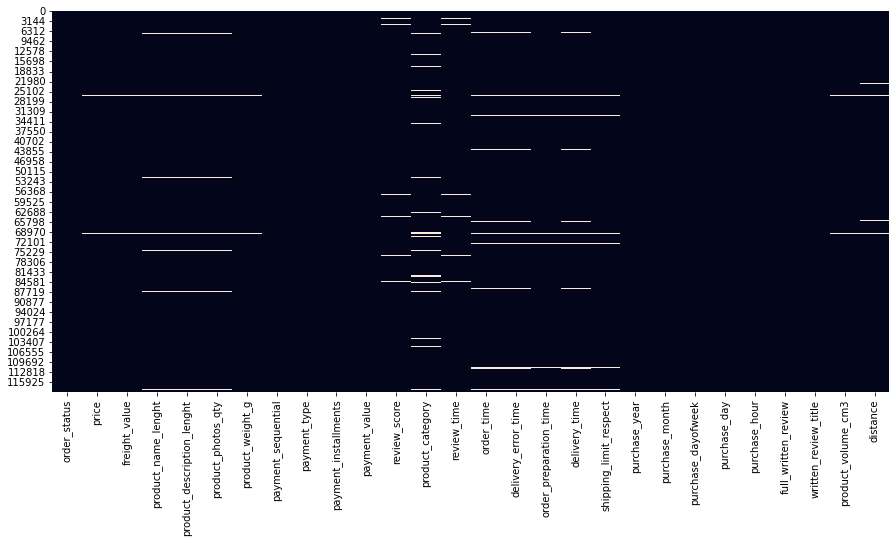

In [473]:
# heatmap des na
plt.figure(figsize = (15, 7))
sns.heatmap(df.isna(), cbar = False)
plt.show()

In [474]:
# Plusieurs lignes sur la heatmap -> commandes pour lesquelles il y a beaucoup de données manquantes
# sont probablement les commandes qui n'ont pas abouti
# les supprimer - on a 41 variables, prendre un seuil de 15 ou 20 variables pour dropper

# nombre de lignes avant traitement -> 119018
# seuil < 20 NaN -> 118377 rows restants
# seuil < 15 NaN -> 117740 rows restants
# seuil < 10 NaN -> 117738 rows restants
# -> peu de différences entre 10 et 15 - prendre 10

df = df[df.isna().sum(axis = 1) < 10]

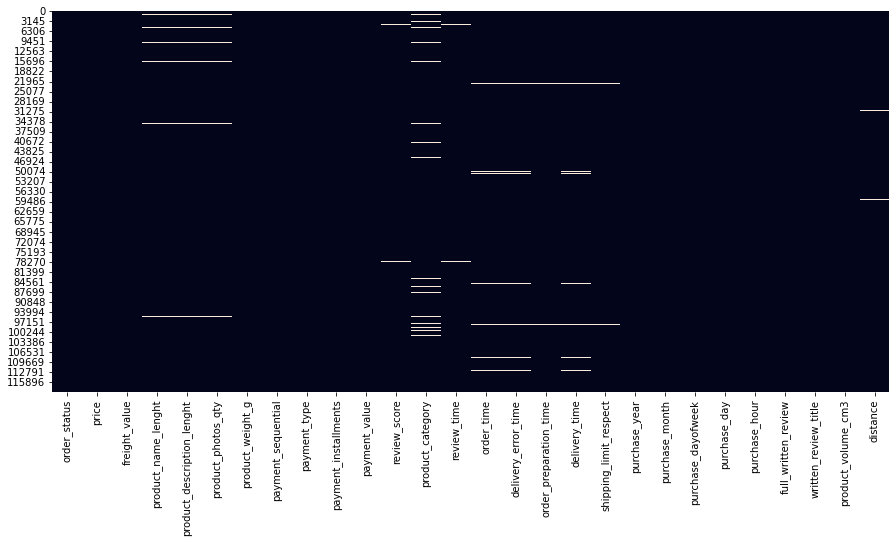

In [475]:
plt.figure(figsize = (15, 7))
sns.heatmap(df.isna(), cbar = False)
plt.show()

In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107121 entries, 0 to 119017
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_status                107121 non-null  object 
 1   price                       107121 non-null  float64
 2   freight_value               107121 non-null  float64
 3   product_name_lenght         105576 non-null  float64
 4   product_description_lenght  105576 non-null  float64
 5   product_photos_qty          105576 non-null  float64
 6   product_weight_g            107103 non-null  float64
 7   payment_sequential          107120 non-null  float64
 8   payment_type                107120 non-null  object 
 9   payment_installments        107120 non-null  float64
 10  payment_value               107120 non-null  float64
 11  review_score                106310 non-null  float64
 12  product_category            101731 non-null  object 
 13  review_time   

In [477]:
# tableau nombre et pourcentage de valeurs manquantes par colonne
print('\nValeurs manquantes par colonne : \n')
pd.set_option('display.max_rows', None) # pour afficher toutes les lignes
values = df.isnull().sum()
percentage = 100 * values / len(df)
table = pd.concat([values, percentage.round(2)], axis = 1)
table.columns = ['Nombres de valeurs manquantes', '% de valeurs manquantes']
display(table[table['Nombres de valeurs manquantes'] != 0].sort_values('% de valeurs manquantes', ascending = False))
pd.reset_option('display.max_rows') # on reset l'option pour ne plus afficher toutes les lignes


Valeurs manquantes par colonne : 



,Nombres de valeurs manquantes,% de valeurs manquantes
product_category,5390,5.03
delivery_time,1877,1.75
delivery_error_time,1876,1.75
order_time,1876,1.75
product_description_lenght,1545,1.44
product_name_lenght,1545,1.44
product_photos_qty,1545,1.44
review_score,811,0.76
review_time,811,0.76
order_preparation_time,687,0.64


In [478]:
# Variables pour lesquelles il reste des NaN (faible pourcentage):

# VARIABLES QUALI
## product_category_name_english
## payment_type

# VARIABLES QUANTI
## payment_sequential
## product_name_lenght
## product_description_lenght
## product_photos_qty
## product_weight_g
## payment_installments
## payment_value
## review_score
## review_time
## order_time
## delivery_error_time
## order_preparation_time
## delivery_time
## shipping_limit_respect
## product_volume_cm3
## distance

In [479]:
# VARIABLES QUALI
# Traiter modalité par modalité et remplacer les NaN par la modalité la plus fréquente

# Catégories de produits
df['product_category'].value_counts()

Leisure and Miscellaneous     60063
Furniture and Home Decor      27807
Electronics and Technology    11582
Fashion and Accessories        2279
Name: product_category, dtype: int64

In [480]:
# Most common = 'bed_bath_table' - ou remplacer par 'unknown' ?? ou par rien ?

df['product_category'].fillna('', inplace = True)

In [481]:
# Type de paiement
df['payment_type'].value_counts()

credit_card    79295
boleto         20337
voucher         5904
debit_card      1584
Name: payment_type, dtype: int64

In [482]:
# Most common = credit_card

df_final['payment_type'].fillna('credit_card', inplace = True)

In [483]:
# VARIABLES QUANTI

df_con = df.select_dtypes(include = ['int', 'float'])
col = df_con.columns

In [484]:
df_con.shape

(107121, 25)

In [485]:
# CHOIX DE K

# dépend du pb -> si supervisé -> comme projet 4
# dépend du métier -> des fois certains nb de voisins font sens
# quand non supervisé -> cacher des valeurs et voir avec quel K on les trouve (très rarement fait)
# prendre valeur par défaut

# https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb#:~:text=The%20optimal%20K%20value%20usually,be%20aware%20of%20the%20outliers.

# "The optimal K value usually found is the square root of N, where N is the total number of samples."

# Nb samples
N = df_con.shape[0]

optimal_K = sqrt(N)
optimal_K

327.2934463138546

In [486]:
# mouaaaaaaaai....

In [487]:
# KNN imputer
KNN_imputer = KNNImputer()
df_KNN = KNN_imputer.fit_transform(df_con)

In [488]:
# donne un array - le convertir en df
df_con = pd.DataFrame(df_KNN, columns = col)

In [489]:
# mettre variables quali au même format que quanti
df_cat = df.select_dtypes(include = ['object'])
col = df_cat.columns

df = pd.concat([df_con, df_cat], axis = 1, join = 'inner')
df

,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_installments,payment_value,review_score,review_time,order_time,delivery_error_time,order_preparation_time,delivery_time,shipping_limit_respect,purchase_year,purchase_month,purchase_dayofweek,purchase_day,purchase_hour,full_written_review,written_review_title,product_volume_cm3,distance,order_status,payment_type,product_category
0,124.99,21.88,41.0,1141.0,1.0,8683.0,1.0,2.0,146.87,4.0,4.94074,8.81250,-10.55862,6.80955,1.99141,-0.80955,2017.0,5.0,1.0,16.0,15.0,0.0,0.0,107136.0,228.79538,delivered,credit_card,Furniture and Home Decor
1,289.00,46.48,43.0,1002.0,3.0,10150.0,1.0,8.0,335.48,5.0,11.94686,16.66175,-7.47131,2.84476,13.80995,3.15524,2018.0,1.0,4.0,12.0,20.0,0.0,0.0,53400.0,302.71858,delivered,credit_card,Furniture and Home Decor
2,139.94,17.79,55.0,955.0,1.0,8267.0,1.0,7.0,157.73,5.0,0.50763,26.07715,1.74920,21.92488,3.14434,-5.92488,2018.0,5.0,5.0,19.0,16.0,0.0,0.0,45968.0,29.14657,delivered,credit_card,Furniture and Home Decor
3,149.94,23.36,48.0,1066.0,1.0,12160.0,1.0,1.0,173.30,5.0,4.77554,14.99846,-12.33027,14.24541,0.69564,-0.28572,2018.0,3.0,1.0,13.0,16.0,0.0,0.0,79968.0,18.11744,delivered,credit_card,Furniture and Home Decor
4,230.00,22.25,61.0,407.0,1.0,5200.0,1.0,8.0,252.25,5.0,7.08324,11.46132,-5.12792,1.21240,10.23597,0.78760,2018.0,7.0,6.0,29.0,9.0,1.0,1.0,23625.0,187.45960,delivered,credit_card,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107115,55.00,20.88,12.0,210.0,2.0,1100.0,1.0,1.0,75.88,1.0,0.93984,17.57944,-18.45272,2.77409,14.76108,13.22591,2017.0,12.0,6.0,17.0,23.0,1.0,0.0,26496.0,307.25951,delivered,boleto,Leisure and Miscellaneous
107116,74.90,13.88,51.0,489.0,2.0,611.0,1.0,6.0,88.78,4.0,14.46880,6.17940,-11.16207,3.41656,2.74862,1.58344,2018.0,4.0,5.0,7.0,15.0,0.0,1.0,11132.0,329.23572,delivered,boleto,Leisure and Miscellaneous
107117,114.90,14.16,51.0,1193.0,1.0,1211.0,1.0,3.0,129.06,5.0,4.44172,7.44054,-8.21198,1.42179,6.00845,4.57821,2018.0,4.0,2.0,4.0,8.0,0.0,0.0,13200.0,188.57356,delivered,credit_card,Leisure and Miscellaneous
107118,37.00,19.04,60.0,575.0,1.0,870.0,1.0,5.0,56.04,1.0,4.07022,30.95237,7.79392,0.89044,30.04928,3.10956,2018.0,4.0,6.0,8.0,20.0,1.0,1.0,9000.0,1662.21122,delivered,boleto,Electronics and Technology


In [490]:
df.isna().sum()

price                         0
freight_value                 0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
payment_sequential            0
payment_installments          0
payment_value                 0
review_score                  0
review_time                   0
order_time                    0
delivery_error_time           0
order_preparation_time        0
delivery_time                 0
shipping_limit_respect        0
purchase_year                 0
purchase_month                0
purchase_dayofweek            0
purchase_day                  0
purchase_hour                 0
full_written_review           0
written_review_title          0
product_volume_cm3            0
distance                      0
order_status                  0
payment_type                  1
product_category              0
dtype: int64

# Outliers

In [491]:
# plus de nan -> ok pour isolation forest

# outliers detectés grâce aux boxplots
# vérifier avec Isolation Forest et supprimer lignes correspondantes

np.random.seed(1)

clf = IsolationForest()
preds = clf.fit_predict(df.select_dtypes(include = ['float64']))
preds

array([ 1,  1,  1, ...,  1, -1,  1])

In [492]:
# anomalies ont un score de -1 : on les enlève
df.drop(df.iloc[np.where(preds == -1)[0]].index,inplace = True)

df.shape

(88848, 28)

# Analyse univariée

In [493]:
# Faire une analyse par variable pour avoir quelque chose de propre et bien détécter outliers ou incohérences ?

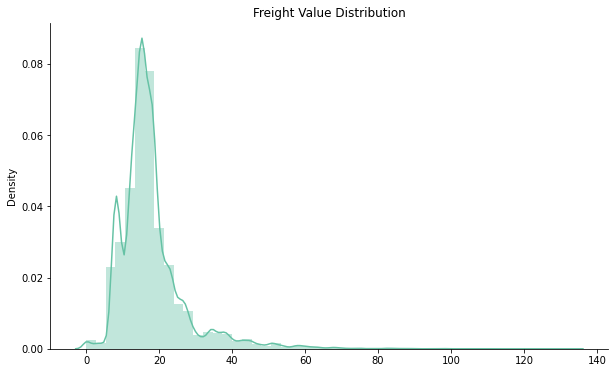

In [494]:
plt.figure(figsize = [10, 6])
sns.set_palette('Set2')
sns.distplot(x = df['freight_value'])
plt.title('Freight Value Distribution')
sns.despine()

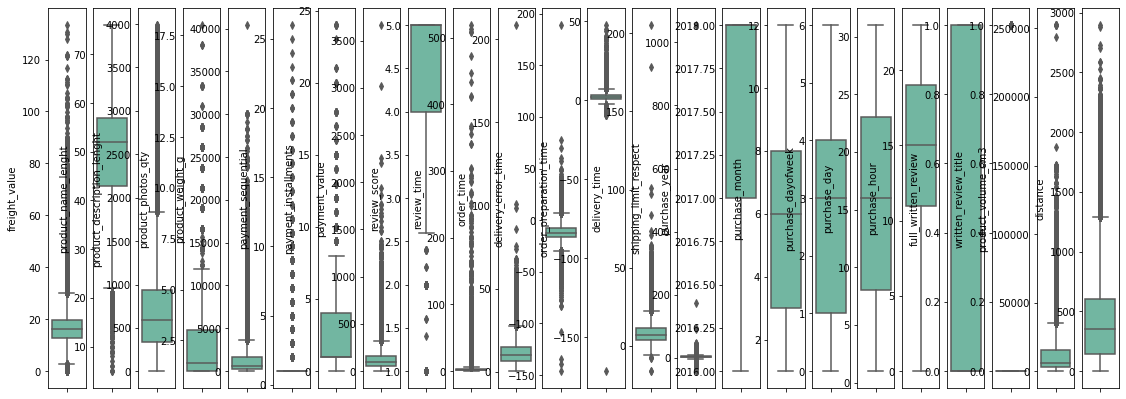

In [495]:
# Boxplots

columns = df.select_dtypes(include = ['float64']).columns
figure = plt.figure(figsize = (20, 7))

for index, col in enumerate(columns):
    if index > 0:
        figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y = col, data = df)
figure.tight_layout()
plt.show()

In [496]:
# modifier legende + taille + emplacement subplots + couleur wtf cette couleur verte

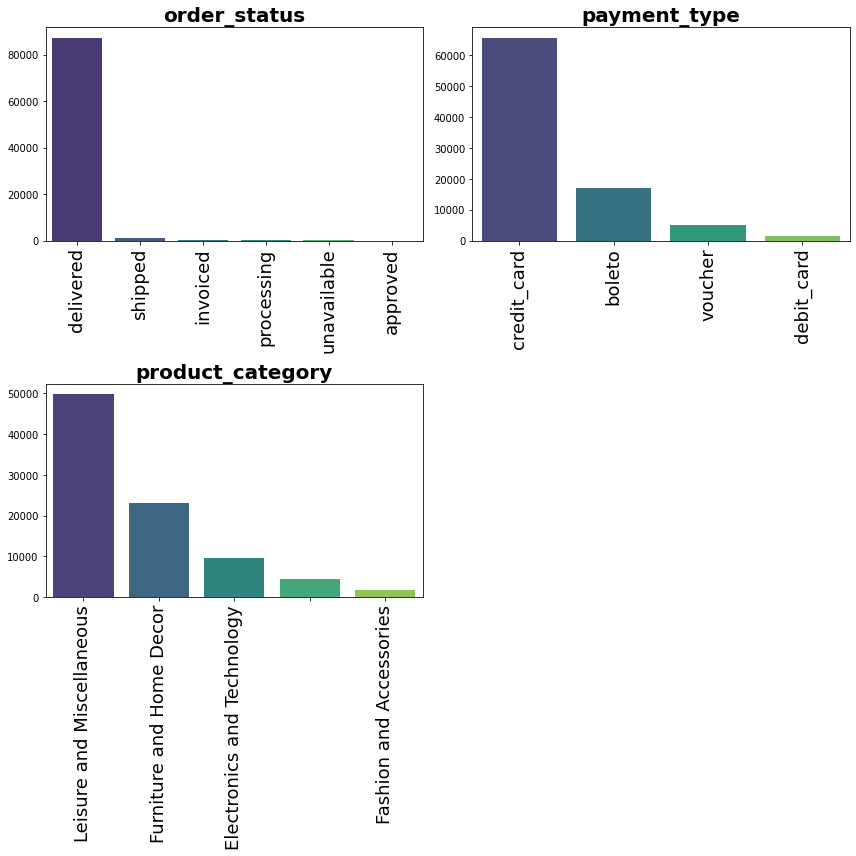

In [497]:
columns = df.select_dtypes(include = ['object']).columns
size = round(math.sqrt(len(columns)))

plt.figure(figsize = (12, 12))
i = 0
for index, col in enumerate(columns):
    if df[col].str.len().mean() < 100: # prendre seulement les colonnes dont les elements ne sont pas trop longs (pour ne pas prendre les descriptions par ex)
        i += 1
        plt.subplot(size, size, i)
        plt.title(col, fontsize = 20, weight = 'bold')
        plt.xticks(fontsize = 18, rotation = 90)
        ax = sns.barplot(x = df[col].value_counts().index[:10],
                        y = df[col].value_counts()[:10],
                        palette = 'viridis')
        ax.set(ylabel = None) # pour enlever nom de l'axe y
        plt.tight_layout()
plt.show()

In [498]:
# pourquoi c'est si gros ??

# Analyse bivariée

In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88848 entries, 0 to 107120
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       88848 non-null  float64
 1   freight_value               88848 non-null  float64
 2   product_name_lenght         88848 non-null  float64
 3   product_description_lenght  88848 non-null  float64
 4   product_photos_qty          88848 non-null  float64
 5   product_weight_g            88848 non-null  float64
 6   payment_sequential          88848 non-null  float64
 7   payment_installments        88848 non-null  float64
 8   payment_value               88848 non-null  float64
 9   review_score                88848 non-null  float64
 10  review_time                 88848 non-null  float64
 11  order_time                  88848 non-null  float64
 12  delivery_error_time         88848 non-null  float64
 13  order_preparation_time      88

In [500]:
df.columns

Index(['price', 'freight_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'payment_sequential', 'payment_installments', 'payment_value',
       'review_score', 'review_time', 'order_time', 'delivery_error_time',
       'order_preparation_time', 'delivery_time', 'shipping_limit_respect',
       'purchase_year', 'purchase_month', 'purchase_dayofweek', 'purchase_day',
       'purchase_hour', 'full_written_review', 'written_review_title',
       'product_volume_cm3', 'distance', 'order_status', 'payment_type',
       'product_category'],
      dtype='object')

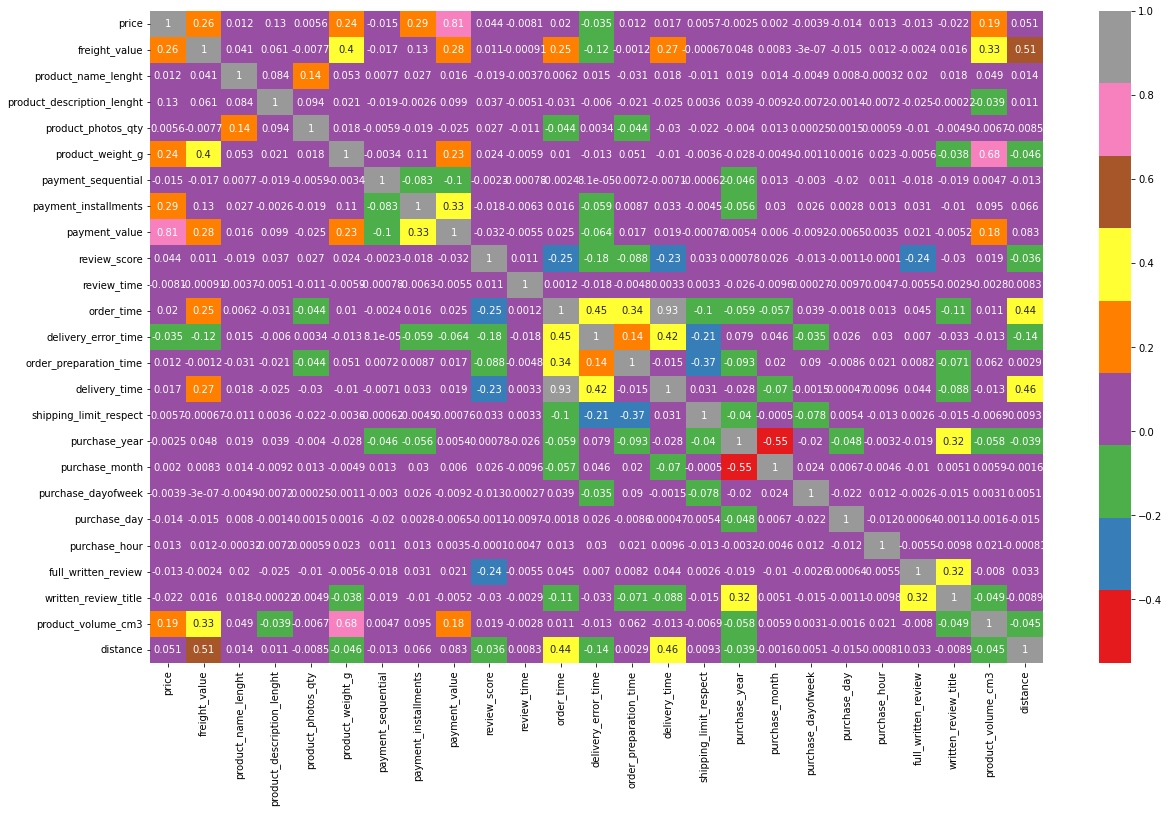

In [501]:
# Matrice de corrélations
plt.figure(figsize = (20, 12))
sns.heatmap(df.corr(), annot = True, cmap = "Set1")
plt.show()

In [502]:
# order_time et delivery_time très fortement corrélés -> garder un des deux seulement
# drop delivery_time car n'est pas fonction du client or ici on essaie de segmenter les comportements clients

# poids et volume fortement corrélés -> garder un des deux seulement
# poids et freight_value fortement corrélés
# freight_value et volume sont aussi fortement corrélés (moins que poids mais quand même)
# garder poids et supprimer les deux autres ? ou garder les deux autres et supprimer le poids ?
# supprimer freight_value car prit en compte dans payment_value
# supprimer volume et garder poids -> et faire l'inverse si résultats sont pas bons

# payment_value et price fortement corrélés -> garder un des deux seulement
# garder payment_value (car prend en compte prix de la livraison)

df.drop(['delivery_time', 'price', 'freight_value', 'product_volume_cm3'], axis = 1, inplace = True)

In [503]:
# supprimer aussi purchase_year ?
df['purchase_year'].unique()

array([2017., 2018., 2016.])

In [504]:
# essayer sans purchase_year et remettre si résultats peu satisfaisants
df.drop(['purchase_year'], axis = 1, inplace = True)

In [505]:
df.columns

Index(['product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'payment_sequential',
       'payment_installments', 'payment_value', 'review_score', 'review_time',
       'order_time', 'delivery_error_time', 'order_preparation_time',
       'shipping_limit_respect', 'purchase_month', 'purchase_dayofweek',
       'purchase_day', 'purchase_hour', 'full_written_review',
       'written_review_title', 'distance', 'order_status', 'payment_type',
       'product_category'],
      dtype='object')

In [506]:
# Pairplot
plt.figure()
#sns.pairplot(df, hue = 'payment_type') # trop lourd avec couleur
#sns.pairplot(df) # trop lourd avec couleur # trop de variables, pas super lisible
plt.show()

<Figure size 432x288 with 0 Axes>

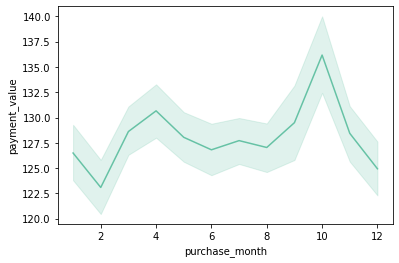

In [507]:
# Ventes de la plateforme par mois

plt.figure()
sns.lineplot(data = df, x = 'purchase_month', y = 'payment_value', markers = True)
plt.show()

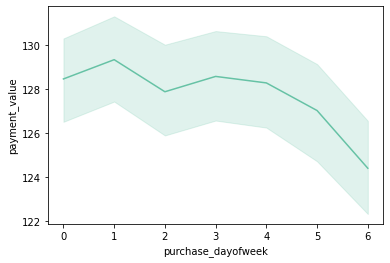

In [508]:
# Ventes de la plateforme par jour de la semaine

plt.figure()
sns.lineplot(data = df, x = 'purchase_dayofweek', y = 'payment_value', markers = True)
plt.show()

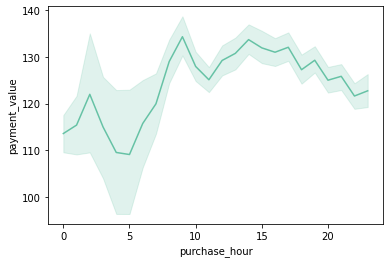

In [509]:
# Ventes de la plateforme par heure de la journée

plt.figure()
sns.lineplot(data = df, x = 'purchase_hour', y = 'payment_value', markers = True)
plt.show()

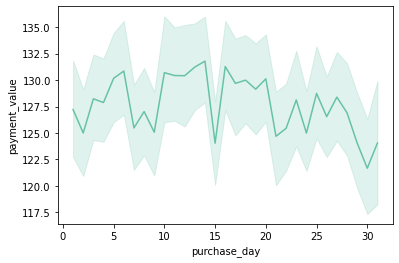

In [510]:
# Ventes de la plateforme par jour du mois

plt.figure()
sns.lineplot(data = df, x = 'purchase_day', y = 'payment_value', markers = True)
plt.show()

In [511]:
# identifier saisonalité ?

# Export du jeu de données final

In [513]:
# Export données 'propres' au format pickle

# Chemin d'accès aux données (à modifier si code en local)
#path = '/content/drive/MyDrive/OpenClassrooms/Projet5/' #-> pour colab
path = '' #-> en local

# specifier le chemin choisi
filepath = os.path.join(path, 'df')

# exporter en format pickle
with open(filepath, 'wb') as f:
    pickle.dump(df, f)